<a href="https://colab.research.google.com/github/SaurabhSRP/12-Cost-of-store-per-customer-Prediction/blob/main/Cost_of_Store_per_customer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
pd.set_option('Display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
palette = sns.color_palette("bright")
%matplotlib inline


In [55]:
df=pd.read_csv("https://raw.githubusercontent.com/SaurabhSRP/12-Media-Marketing-Cost-Prediction/main/media%20prediction%20and%20its%20cost.csv")
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,1,Partial High School,Normal,Skilled Manual,Y,1,$10K - $30K,1,1,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,M,0,Bachelors Degree,Silver,Professional,Y,4,$50K - $70K,0,4,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,S,F,4,Partial High School,Normal,Manual,N,1,$10K - $30K,0,1,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,M,F,2,High School Degree,Bronze,Manual,Y,2,$30K - $50K,2,2,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3,Double Down Sale,USA,M,M,0,Partial High School,Bronze,Skilled Manual,N,2,$30K - $50K,0,2,Golden,1.36,7.12,5.11,0,1,29,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,Radio,50.79


In [56]:
df.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  int64  
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  int64  
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

Lets drop the "avg_cars_at_home" as it is repeating

In [58]:
df.drop("avg_cars_at home(approx).1",axis=1,inplace=True)

#**Explorartory data analysis**

###**Numerical_features**

In [59]:
numerical_features=["store_sales(in millions)","store_cost(in millions)","SRP","gross_weight","net_weight","cost"]

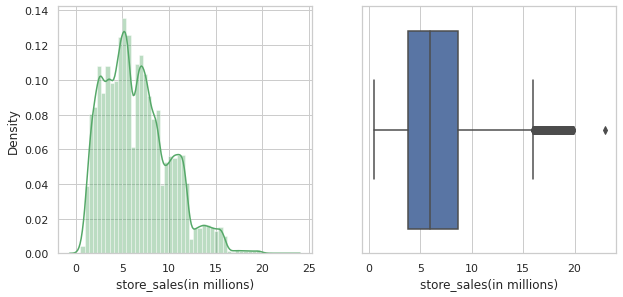

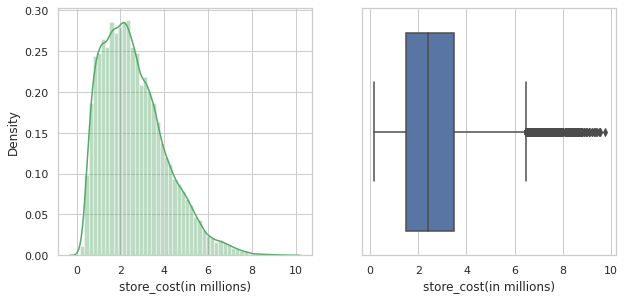

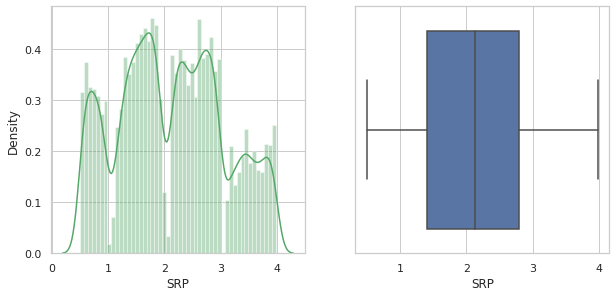

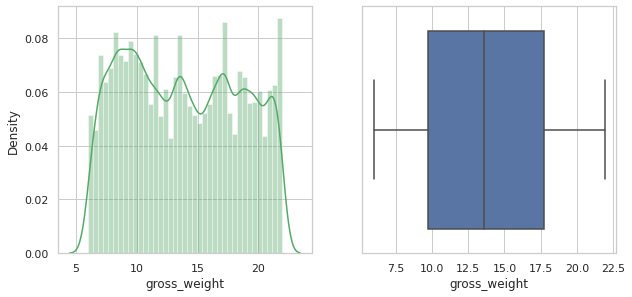

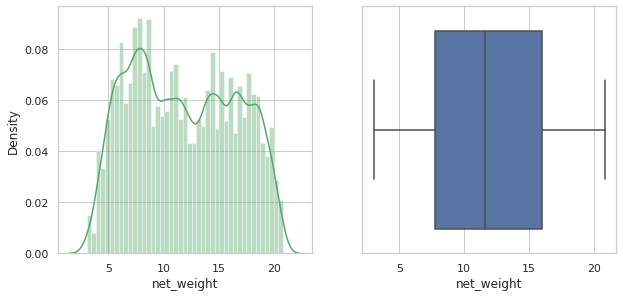

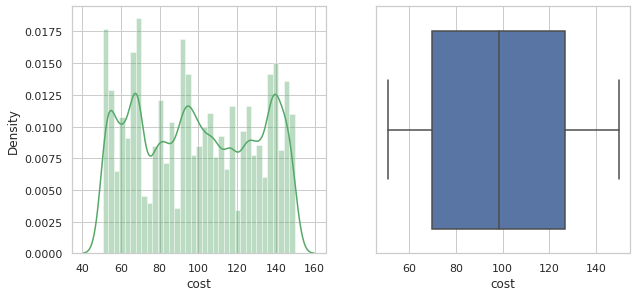

In [73]:
for feature in numerical_features:
  plt.figure(figsize=(10,10))
  plt.subplot(2,2,1)
  sns.distplot(df[feature],color='g')

  plt.subplot(2,2,2)
  sns.boxplot(df[feature])

##store_cost , store_sales are skewed data , we will perform transformation during feature engineering 
##we dont notice any outliers in the rest of the numerical data

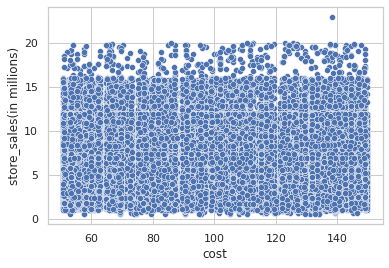

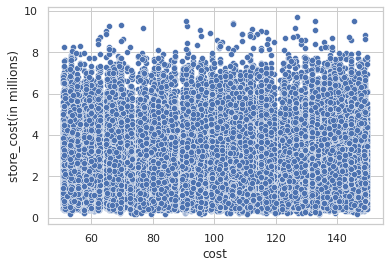

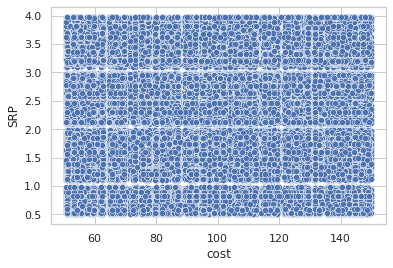

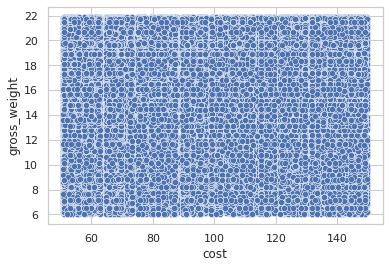

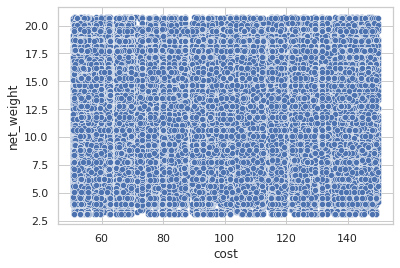

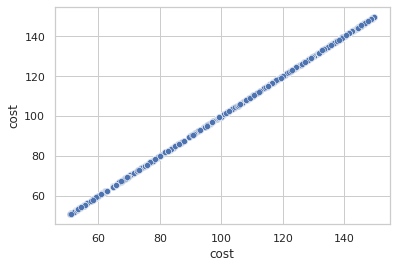

In [70]:
for feature in numerical_features:
  plt.figure()
  sns.scatterplot(x="cost",y=feature,data=df,palette=palette)

##We can see that there is no direct corelation with the cost of each customer with the numerical feature

###**categorical_feature**

In [92]:
categorical_features=[feature for feature in df.columns if feature not in numerical_features]

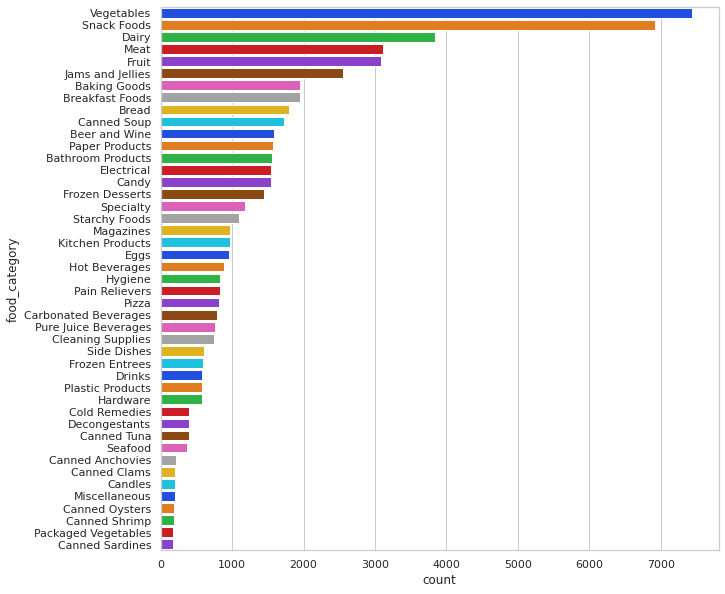

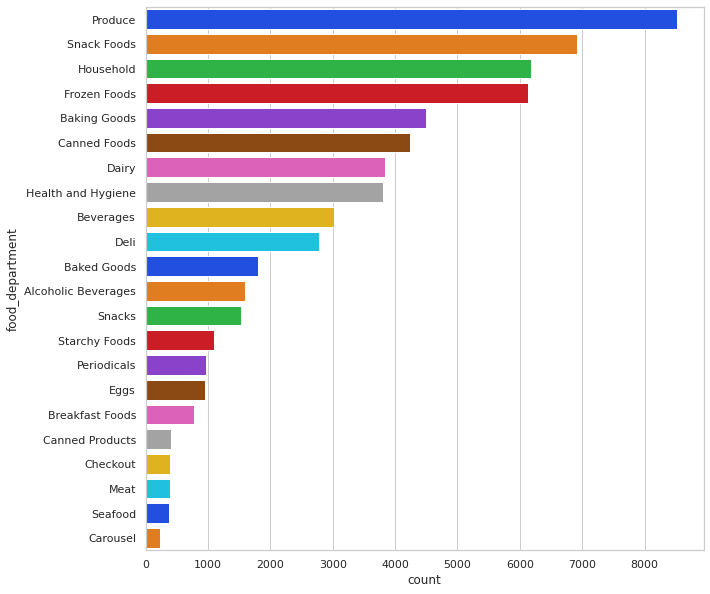

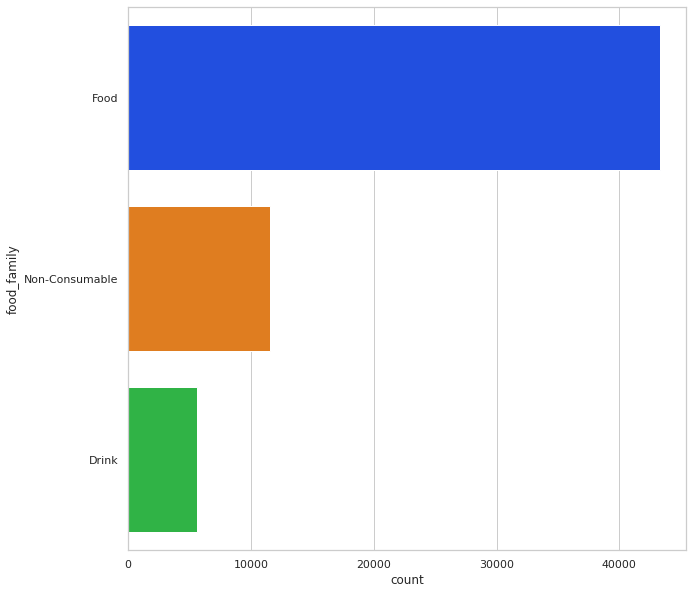

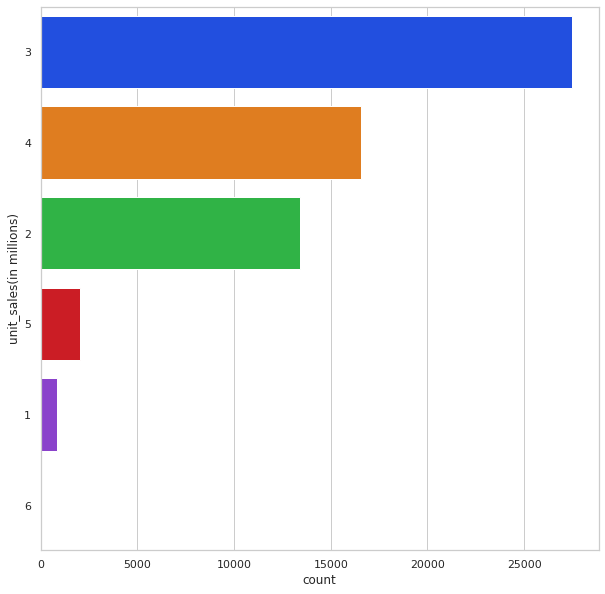

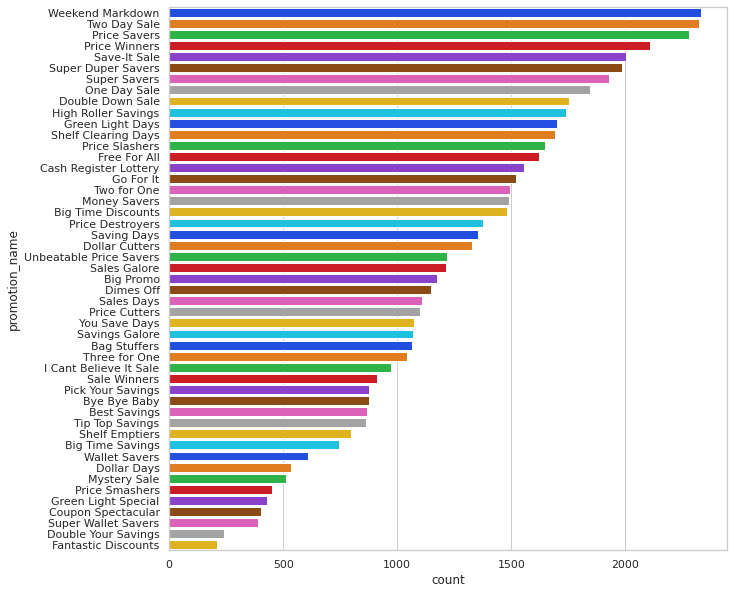

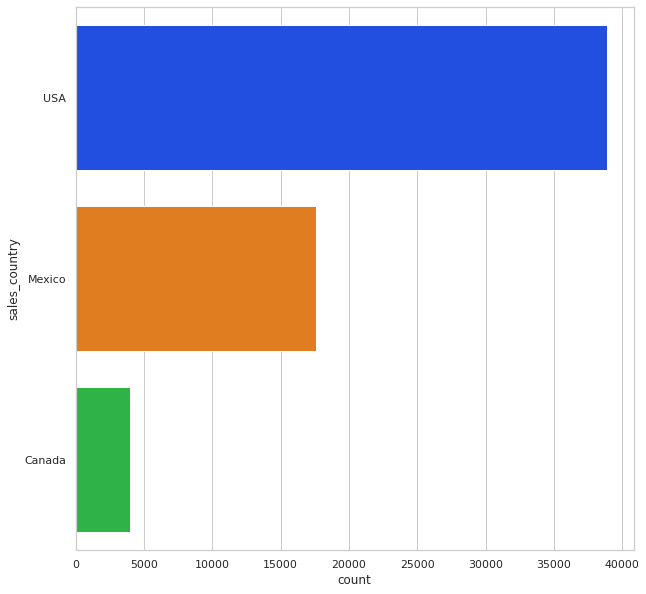

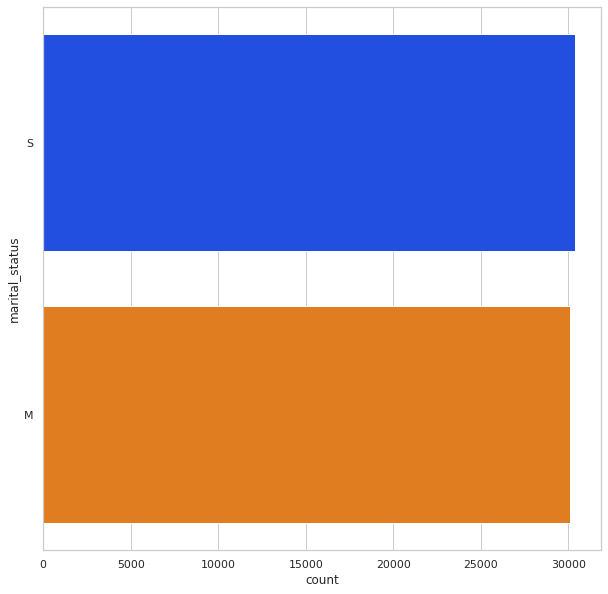

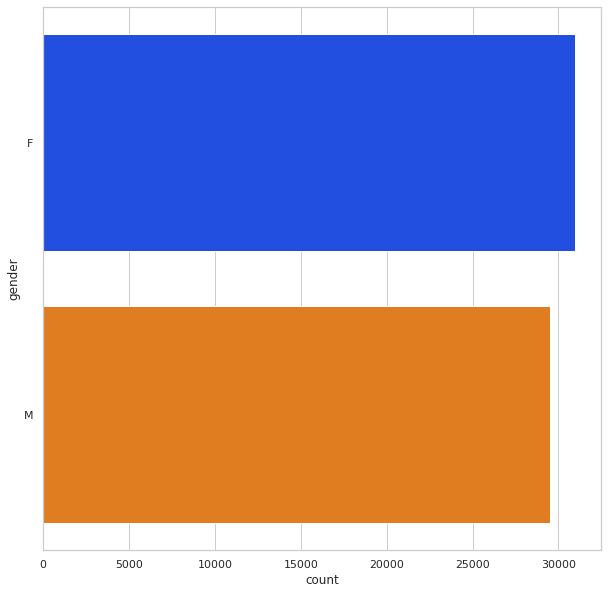

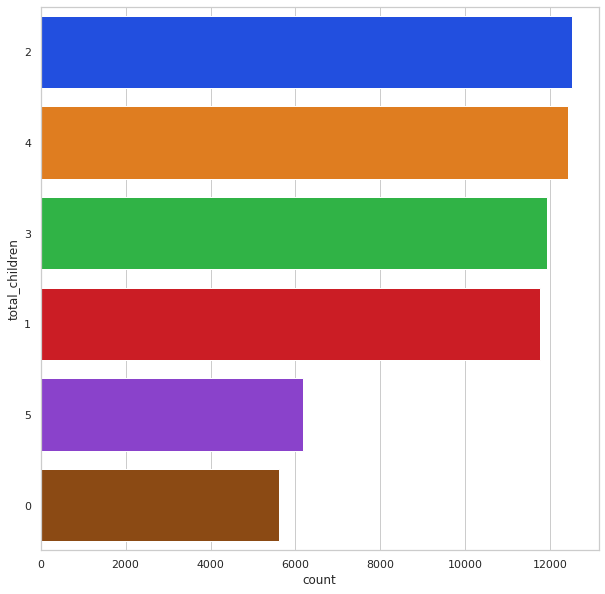

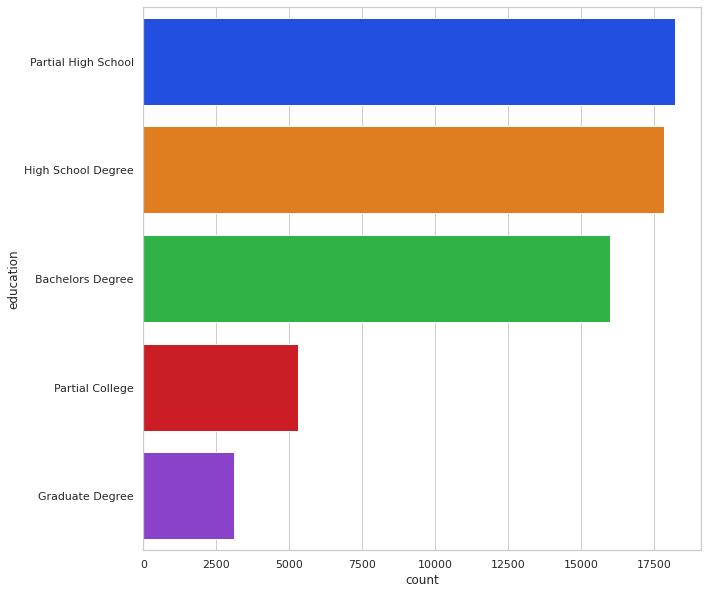

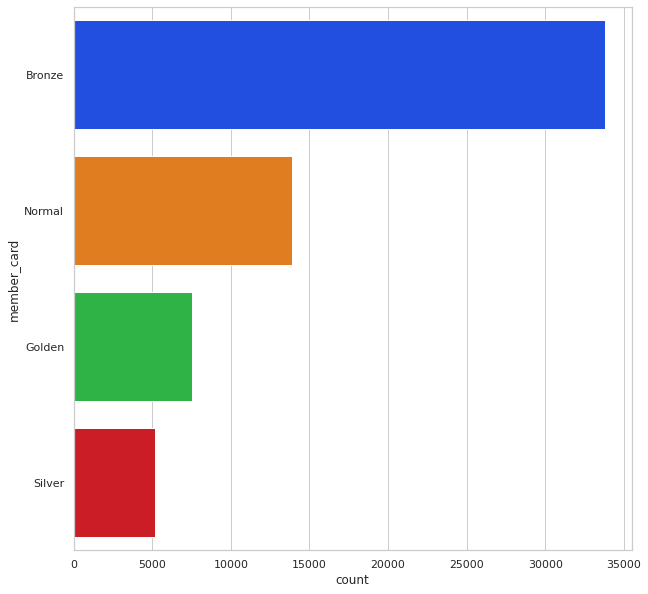

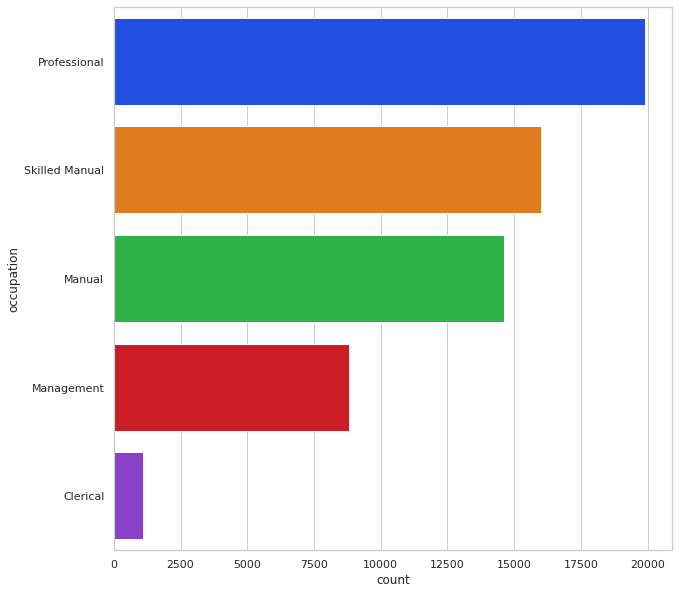

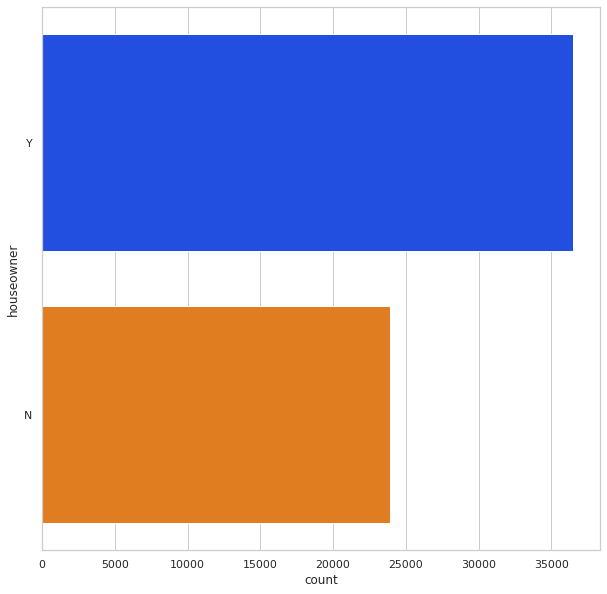

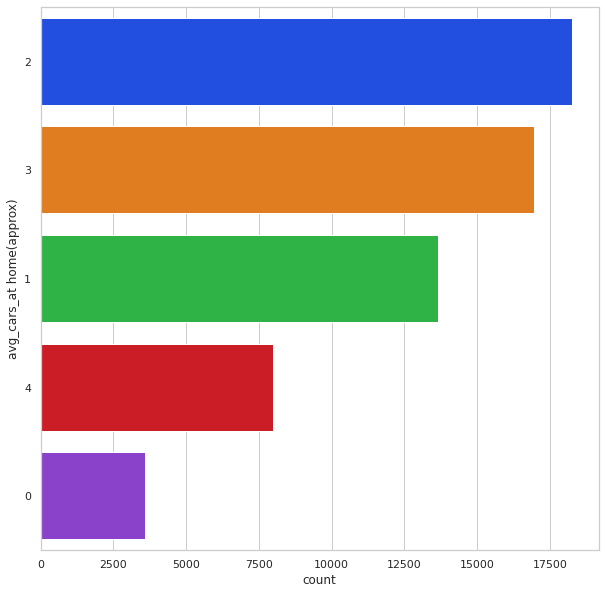

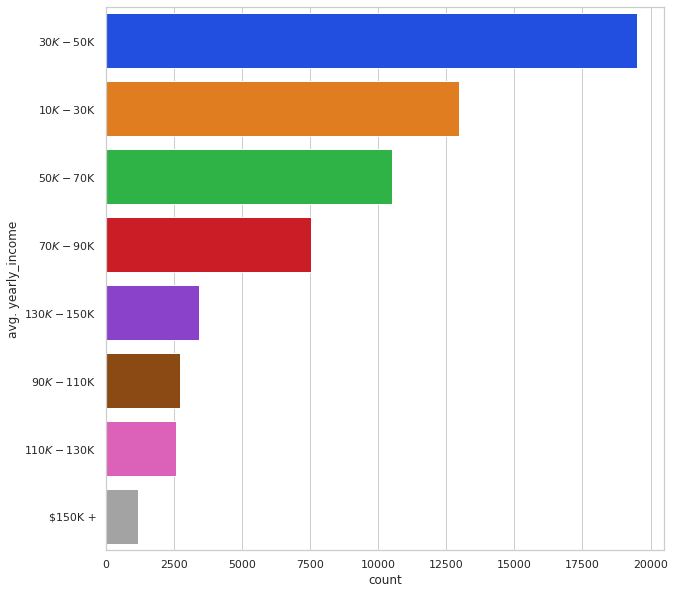

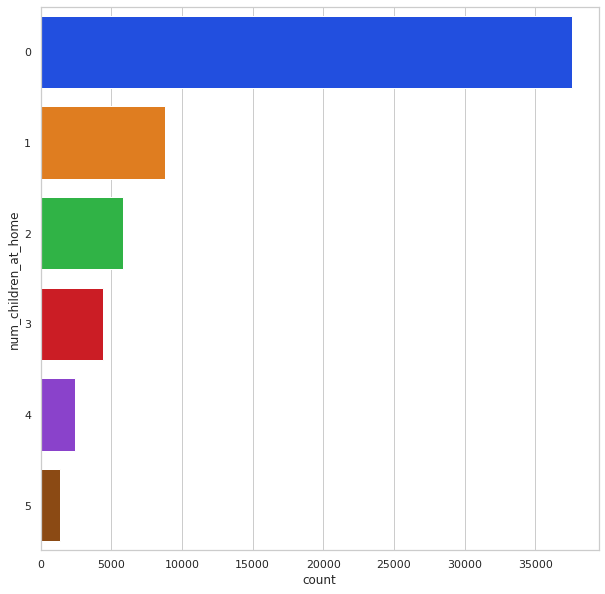

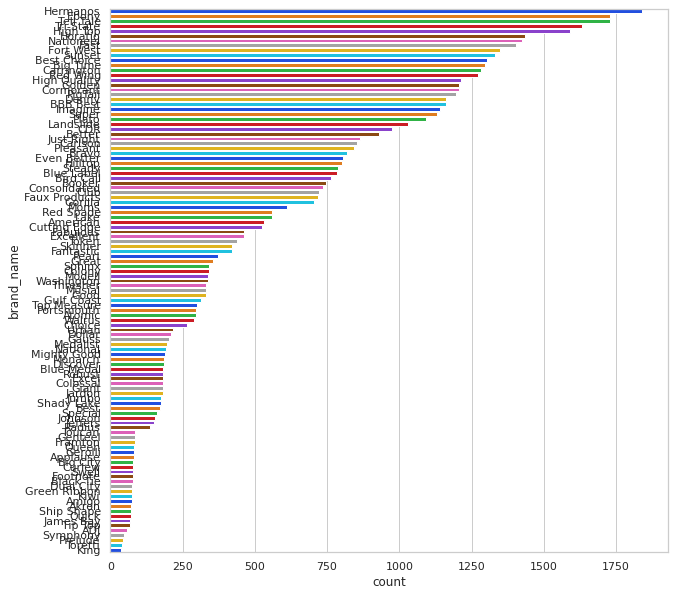

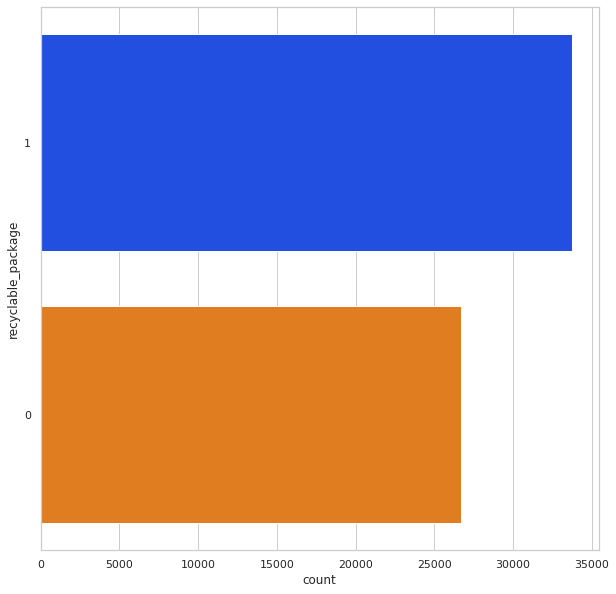

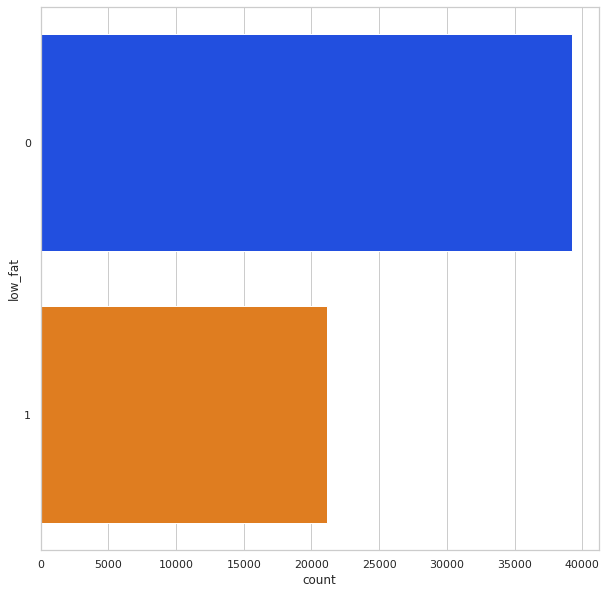

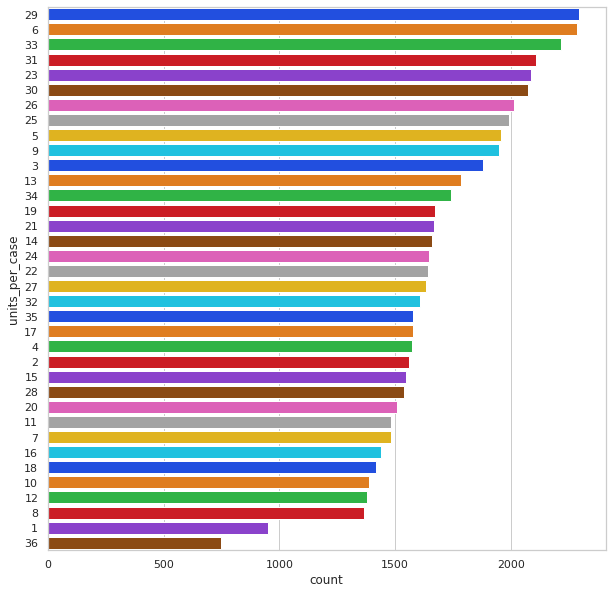

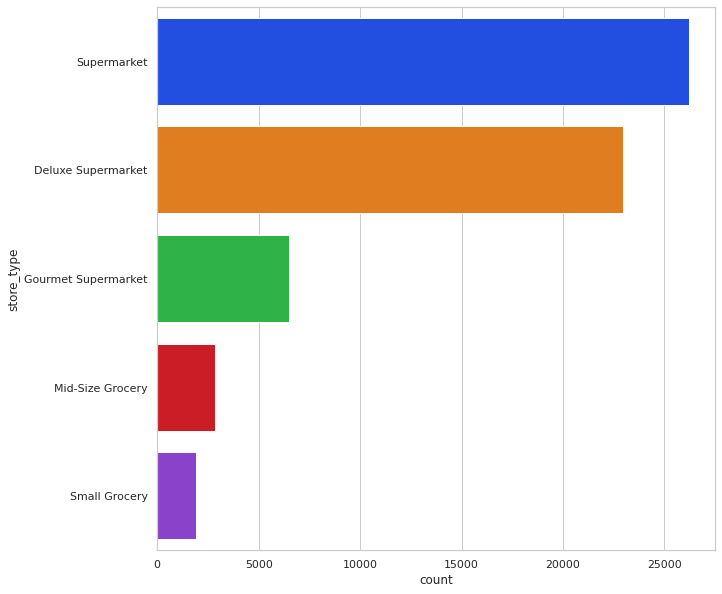

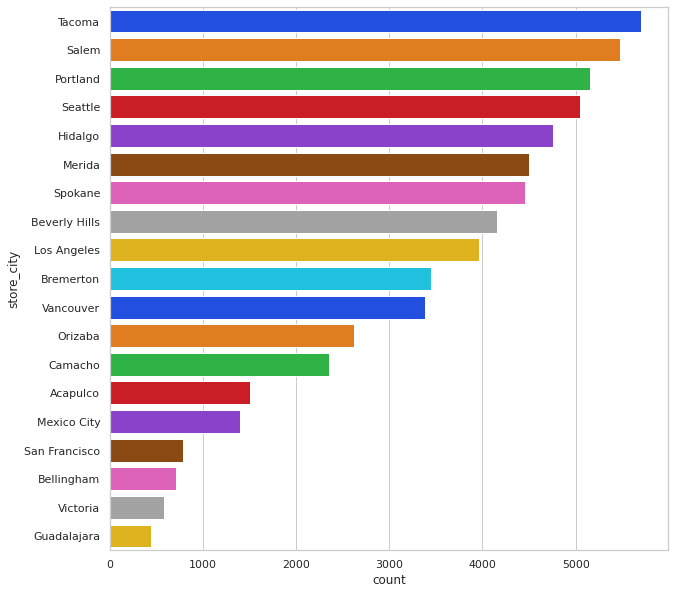

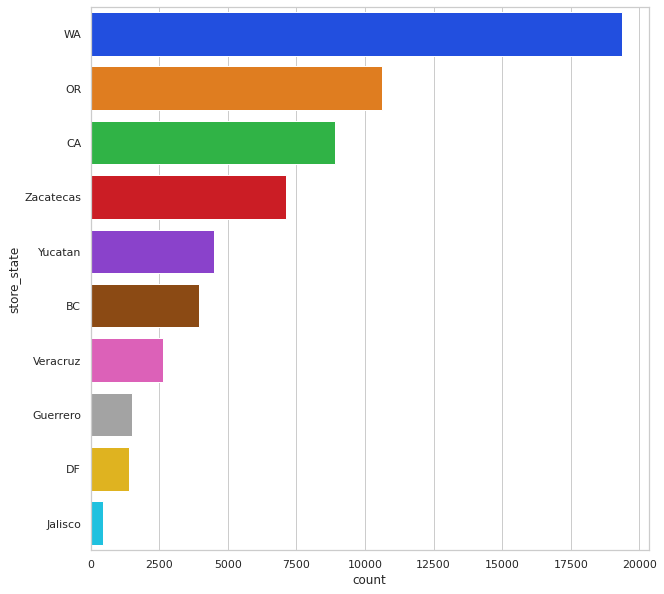

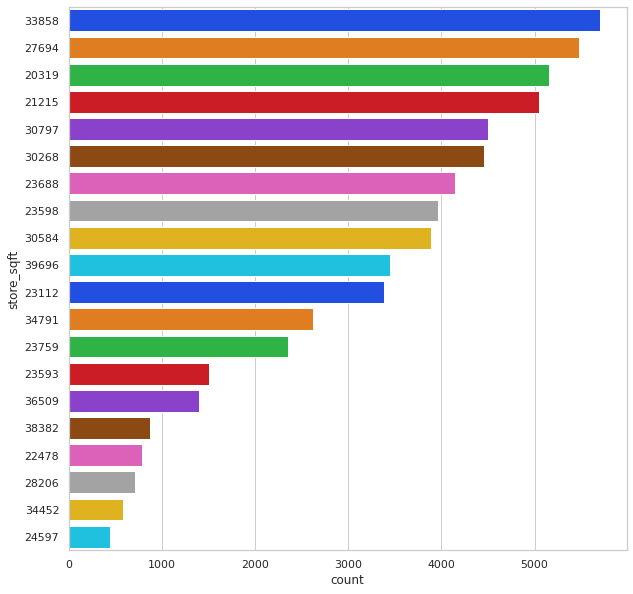

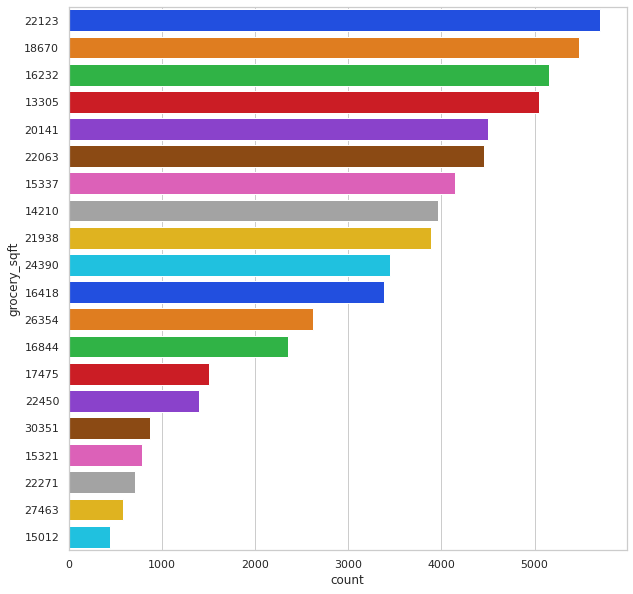

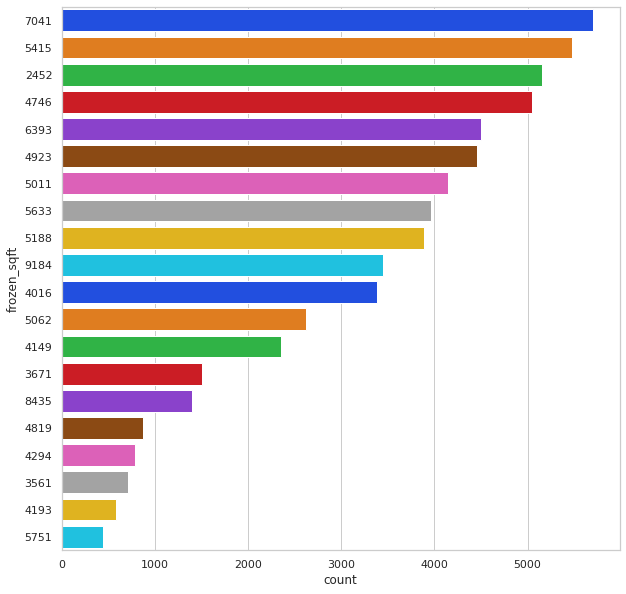

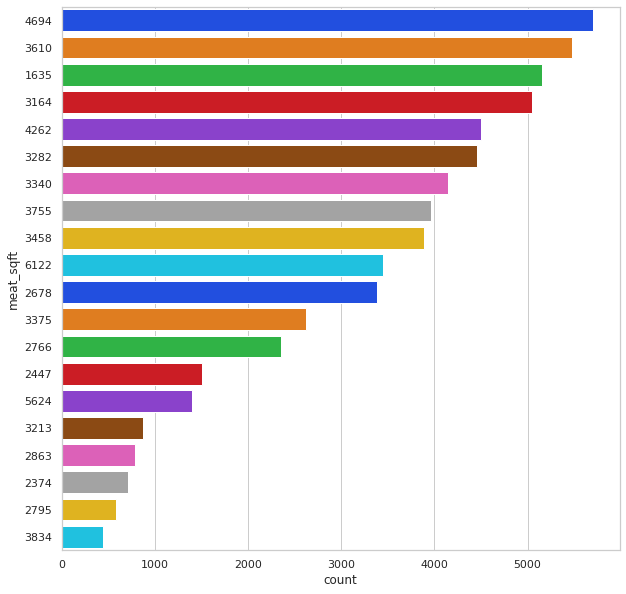

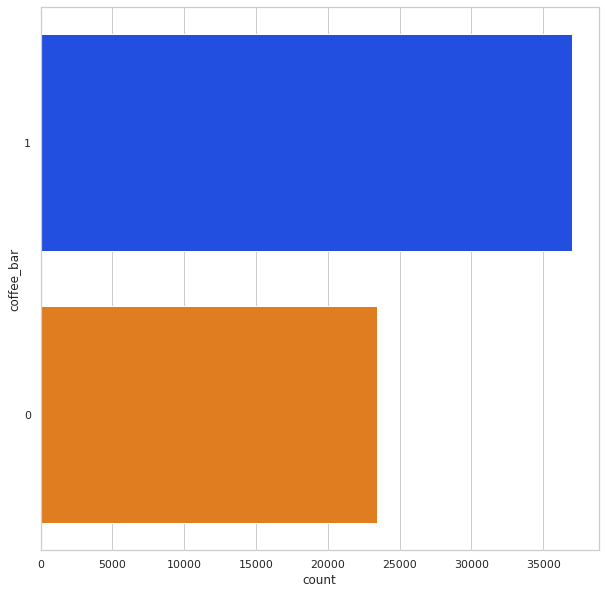

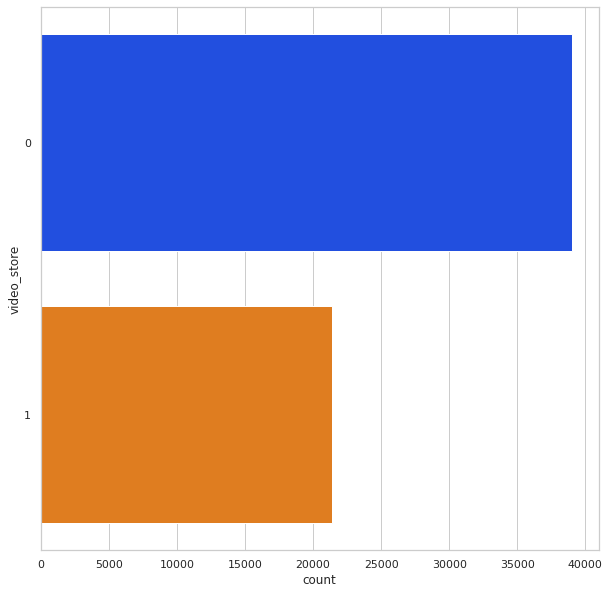

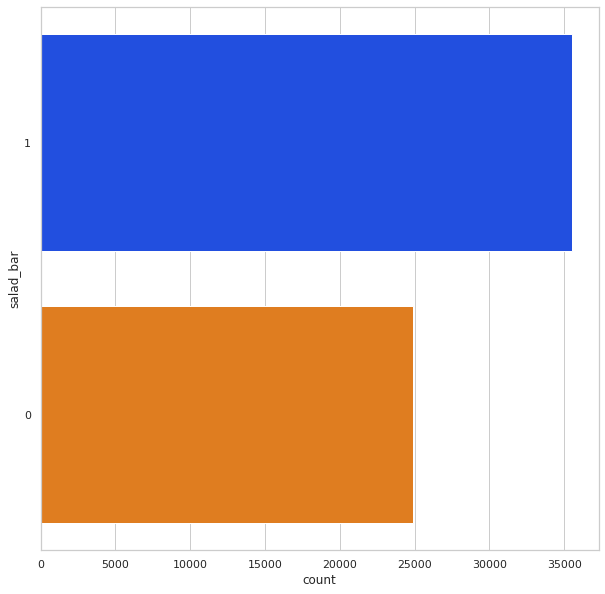

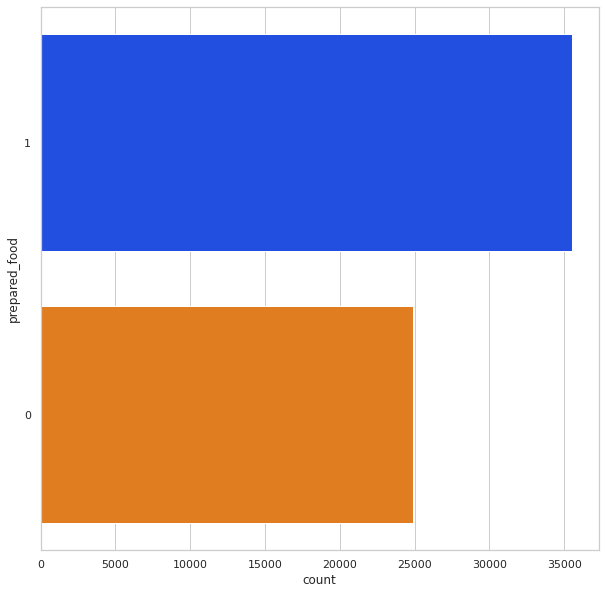

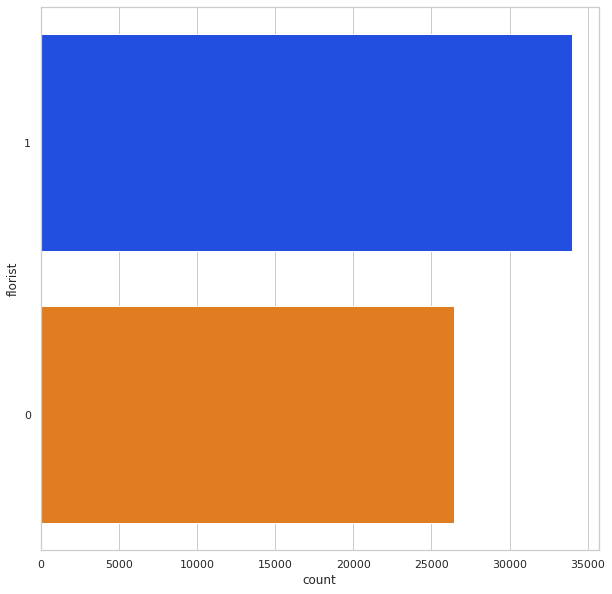

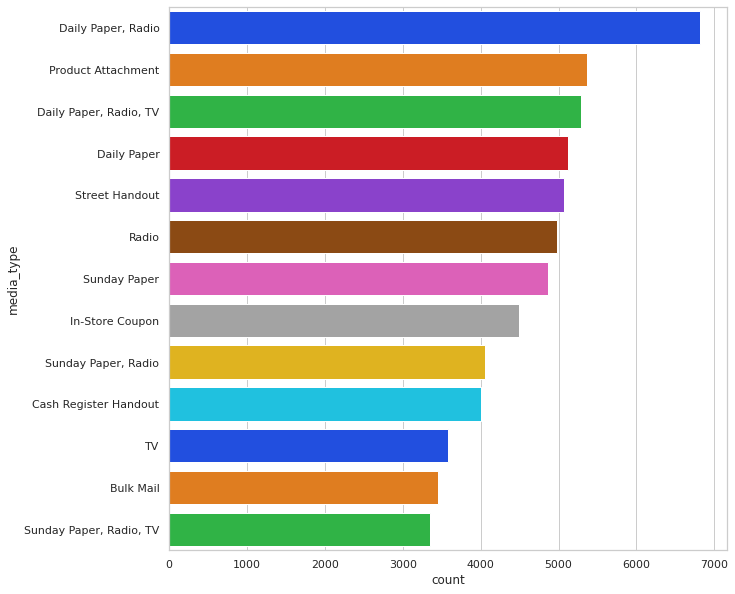

In [104]:
for feature in categorical_features:
  plt.figure(figsize=(10,10))
  sns.countplot(y=df[feature],palette=palette,data=df,order=df[feature].value_counts().index)

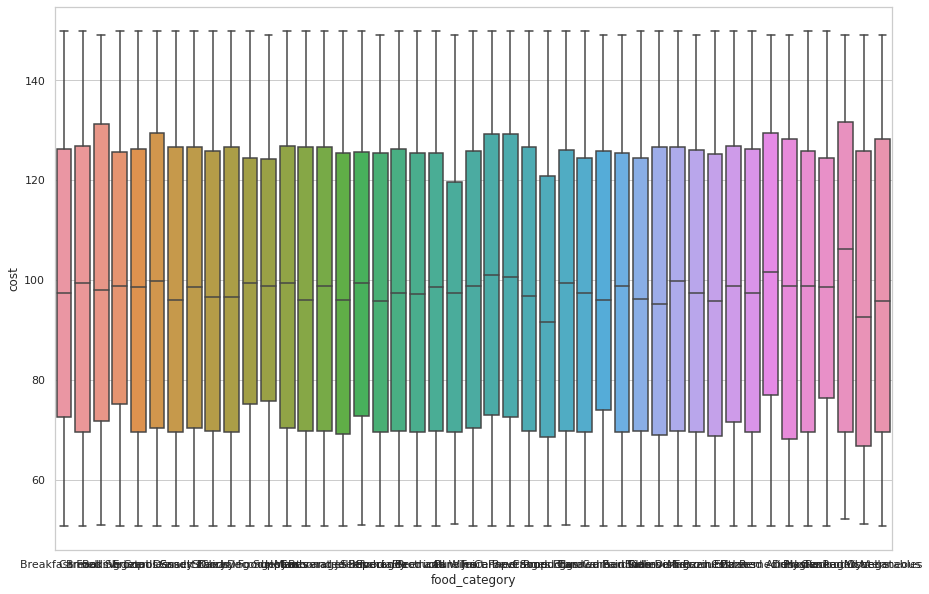

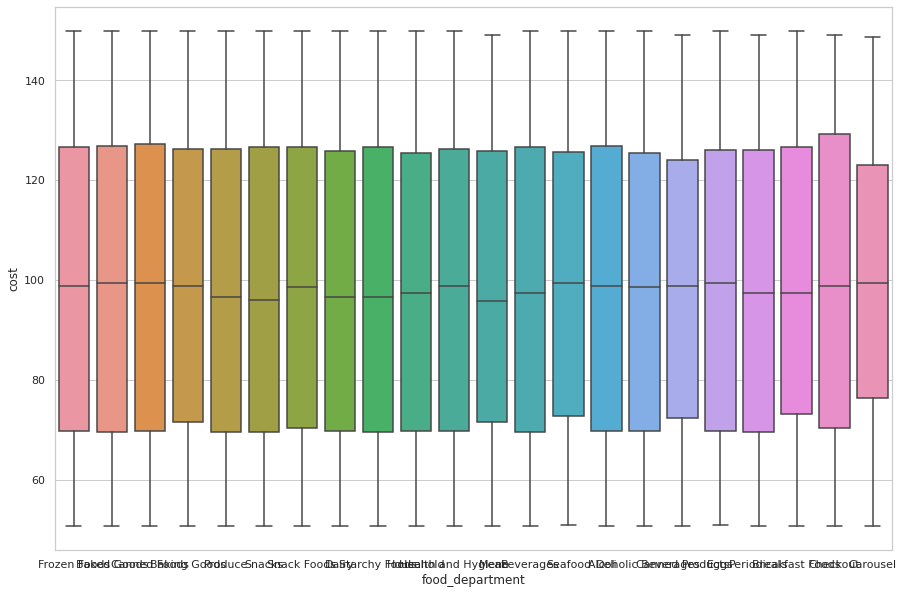

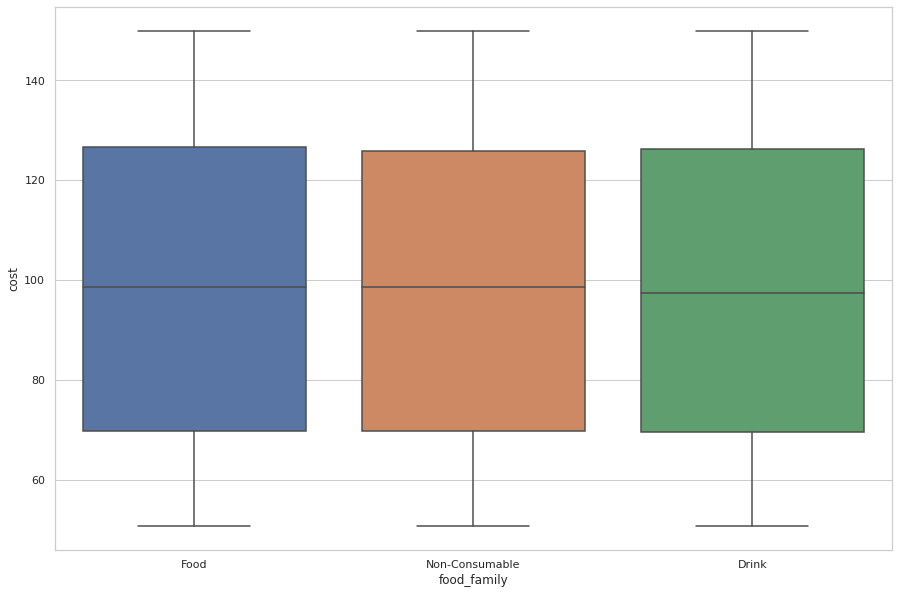

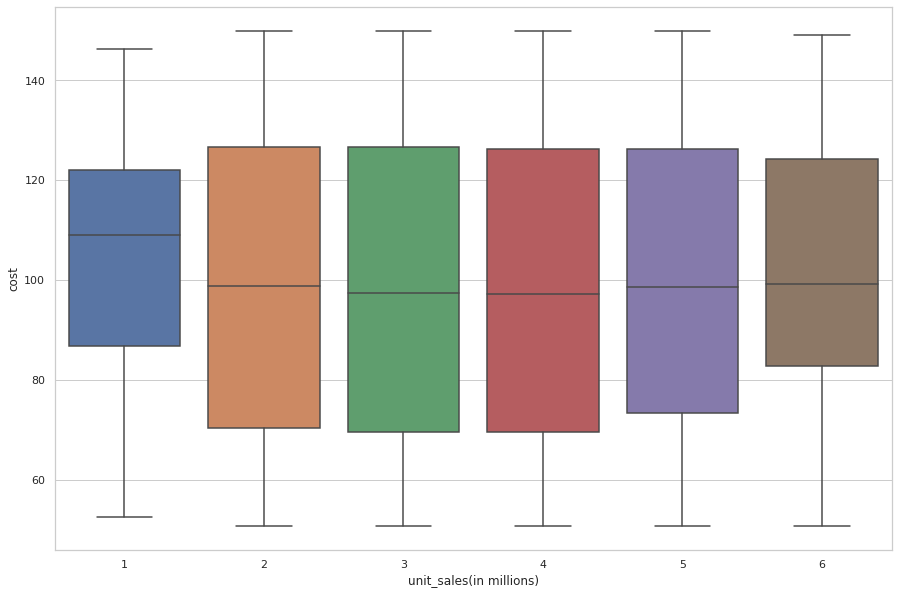

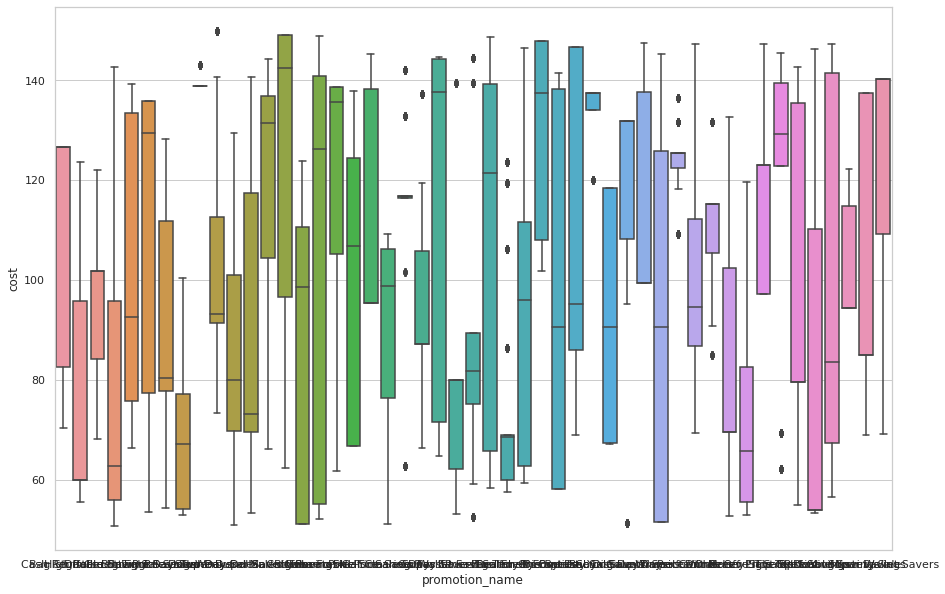

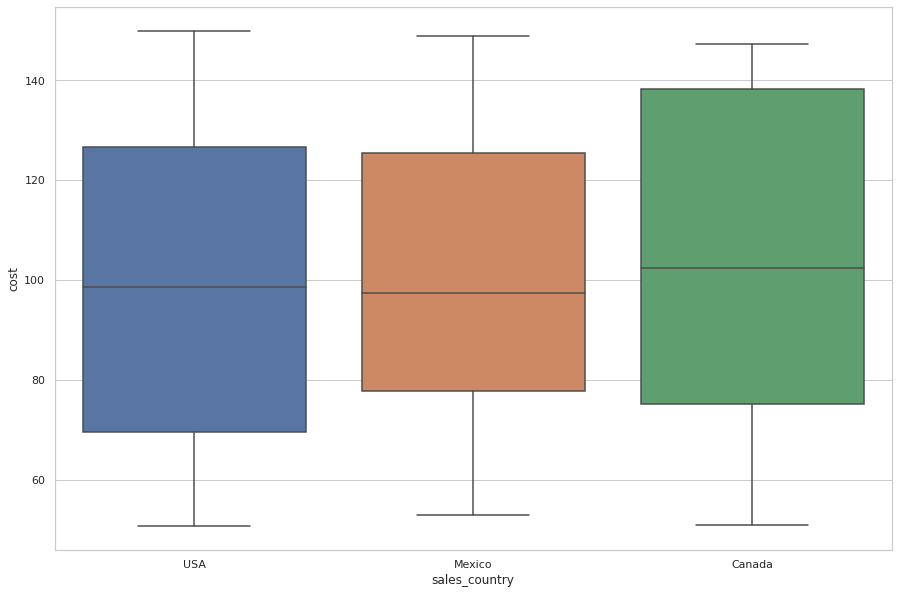

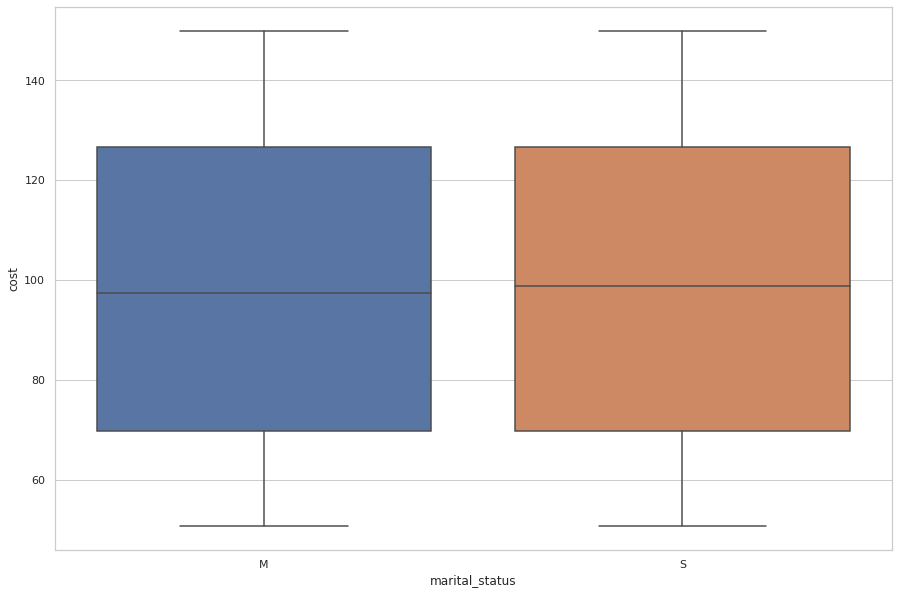

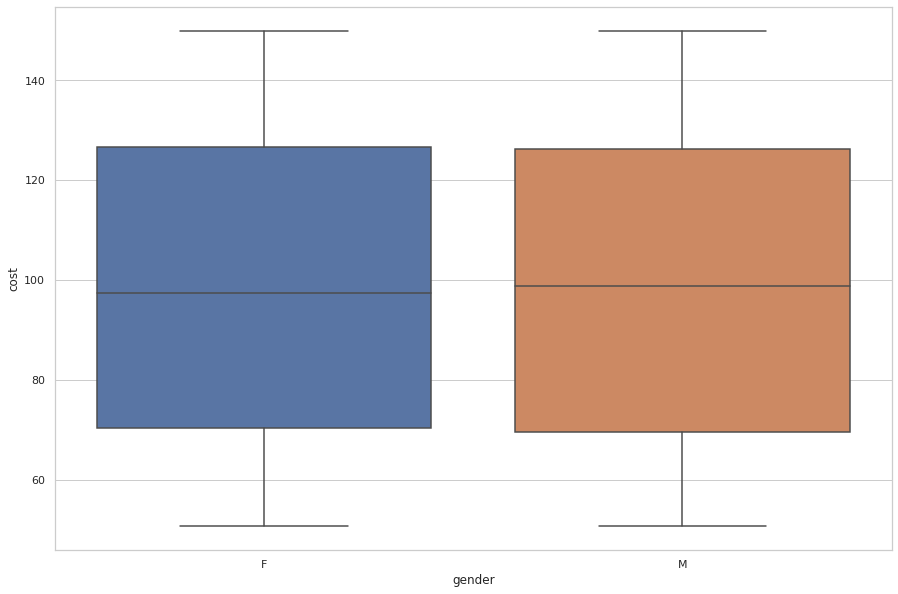

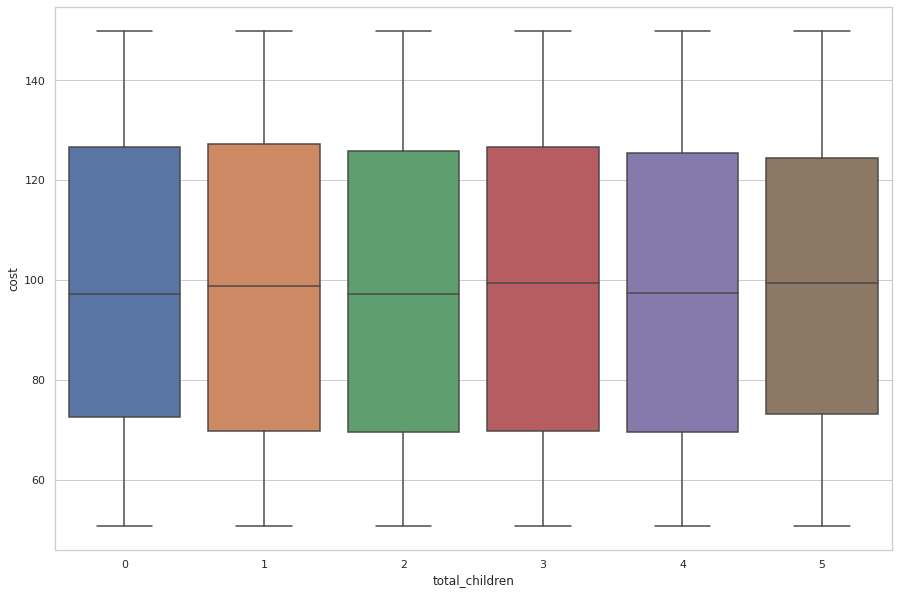

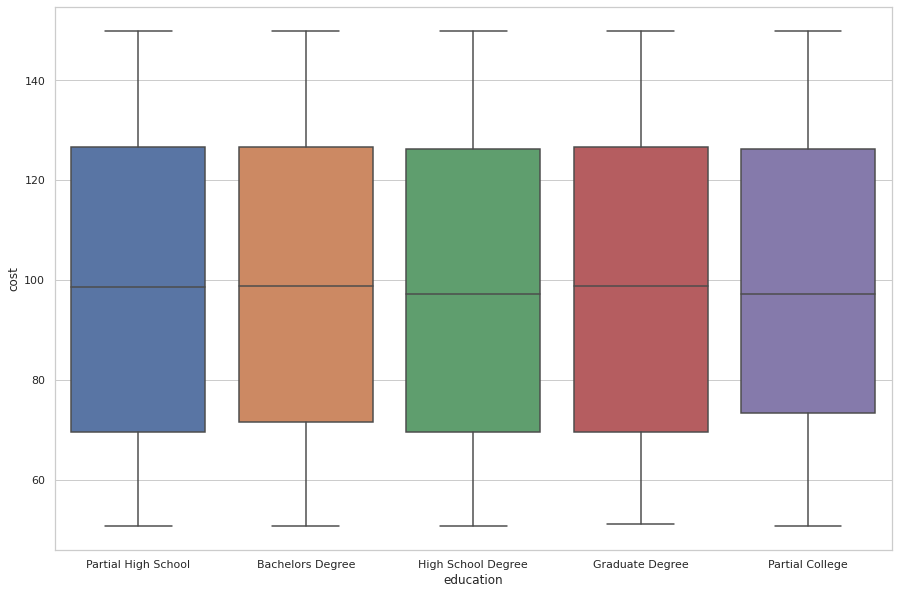

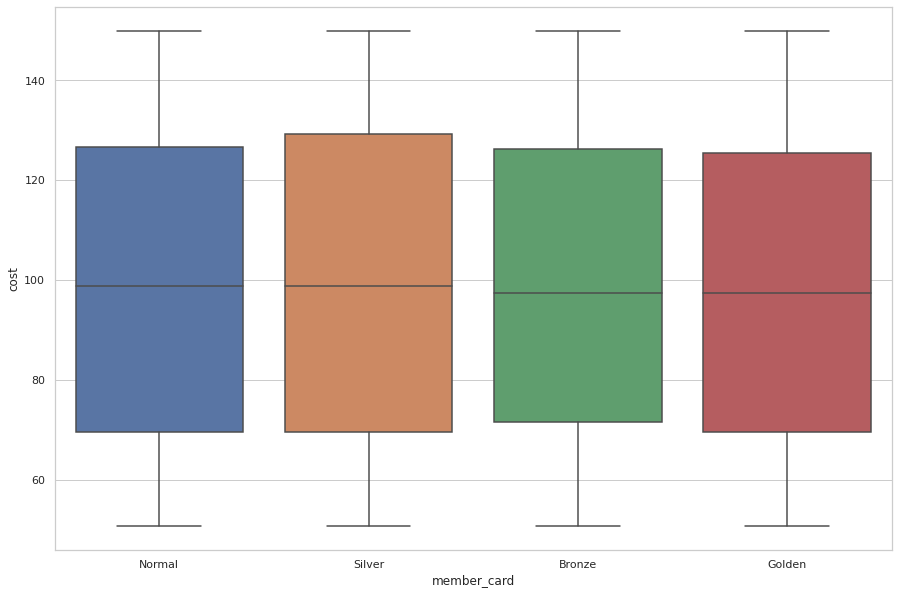

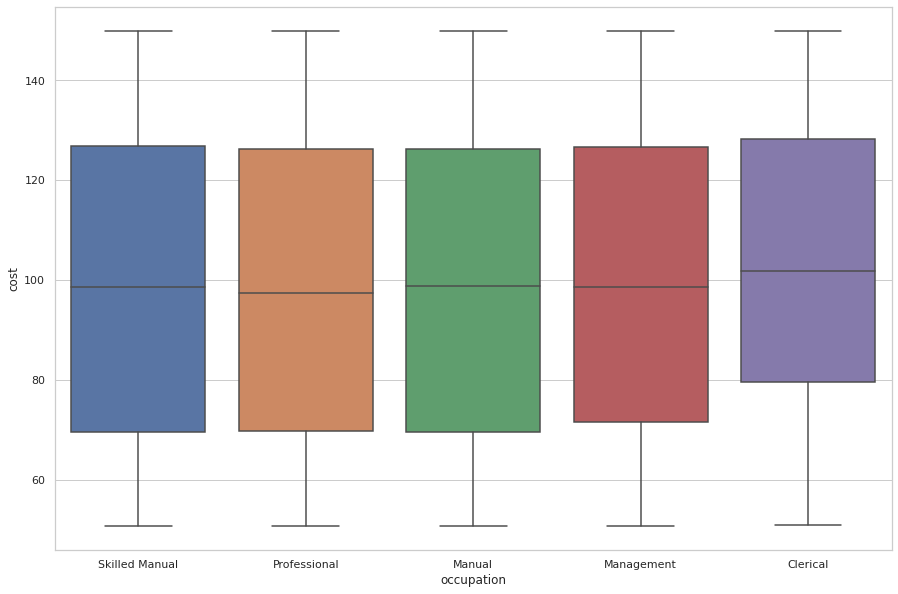

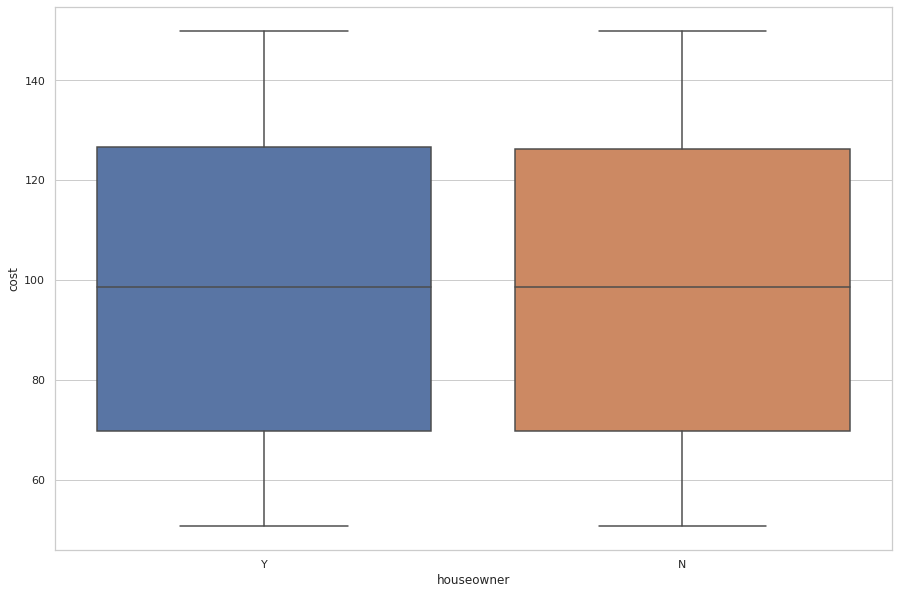

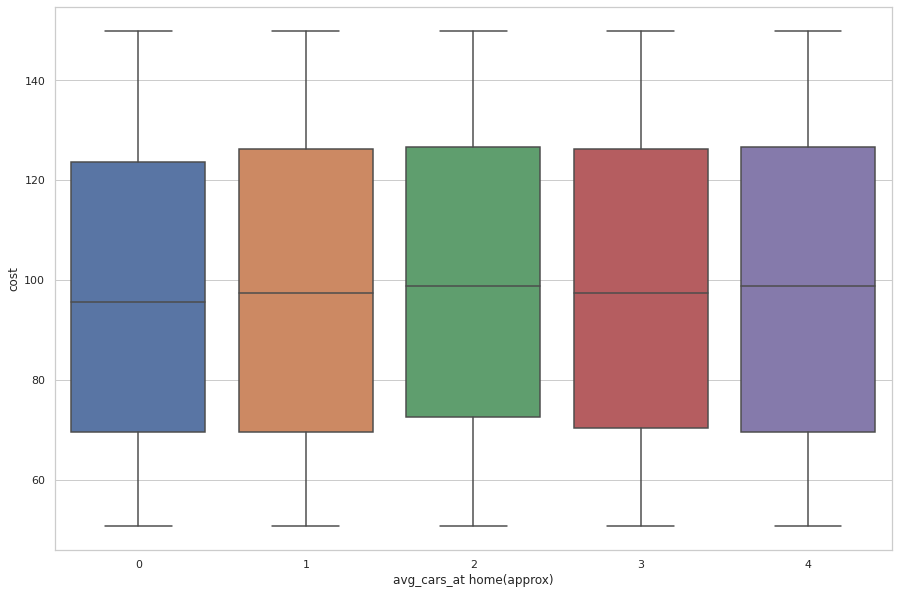

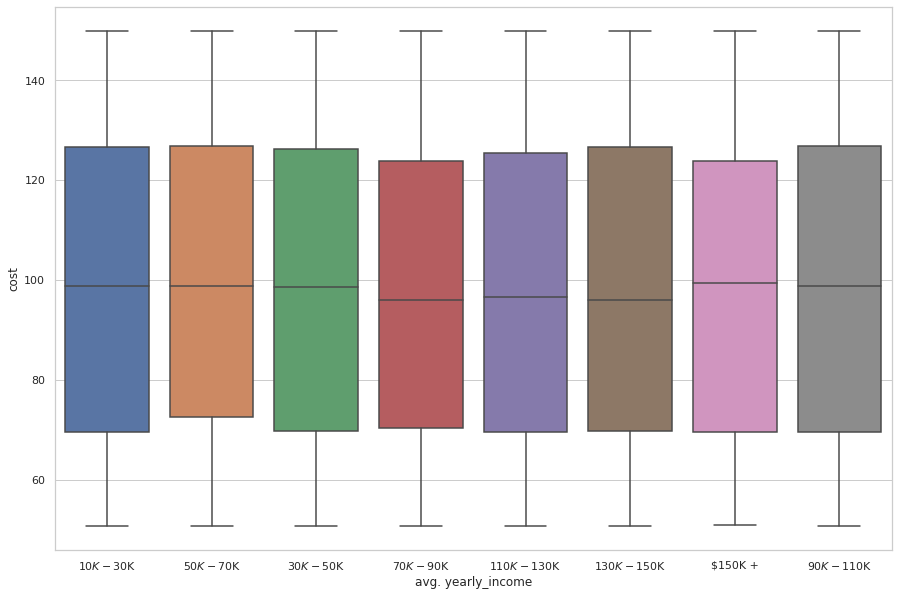

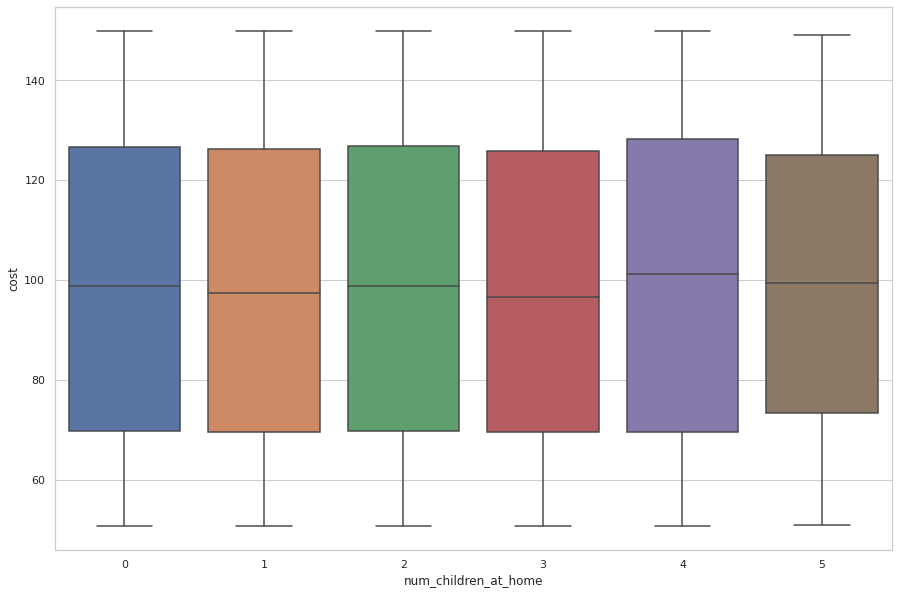

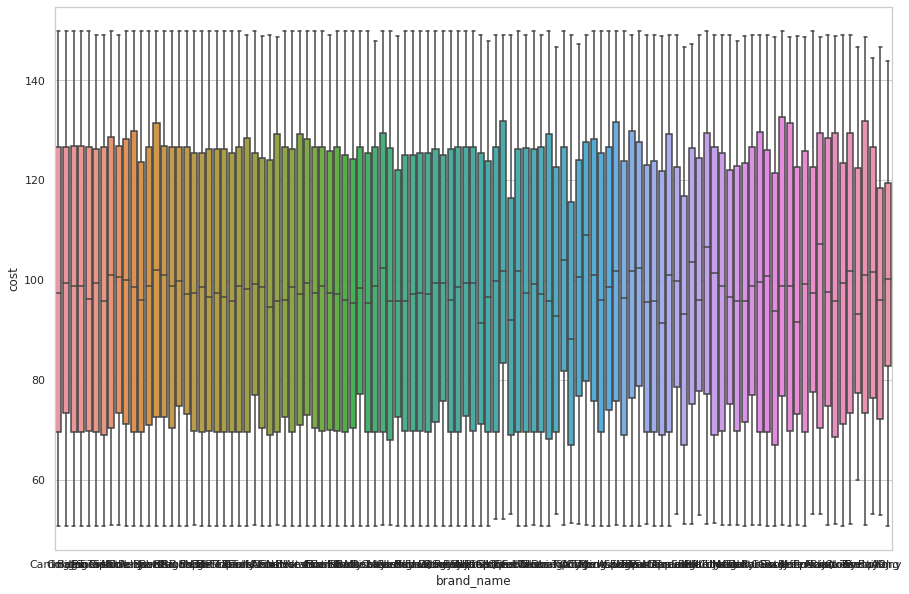

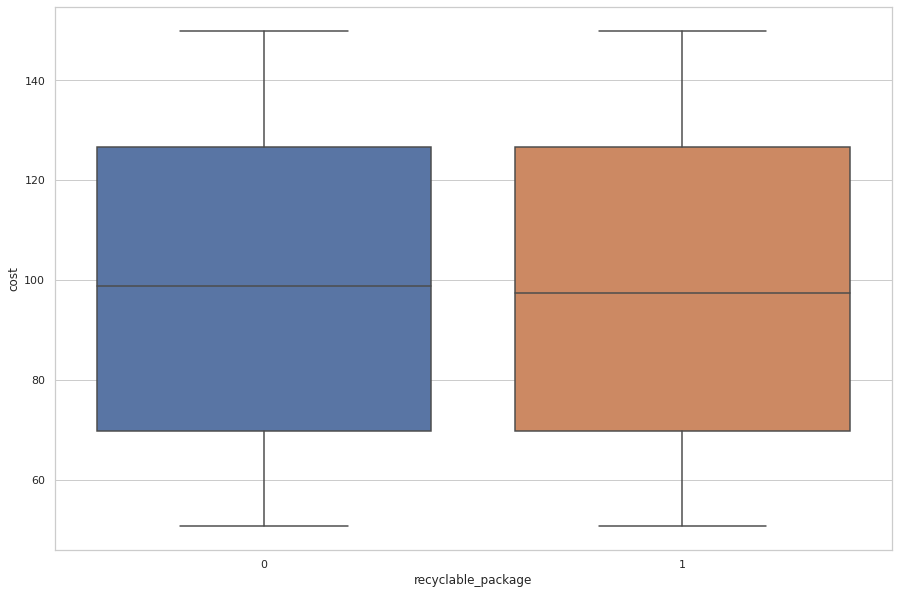

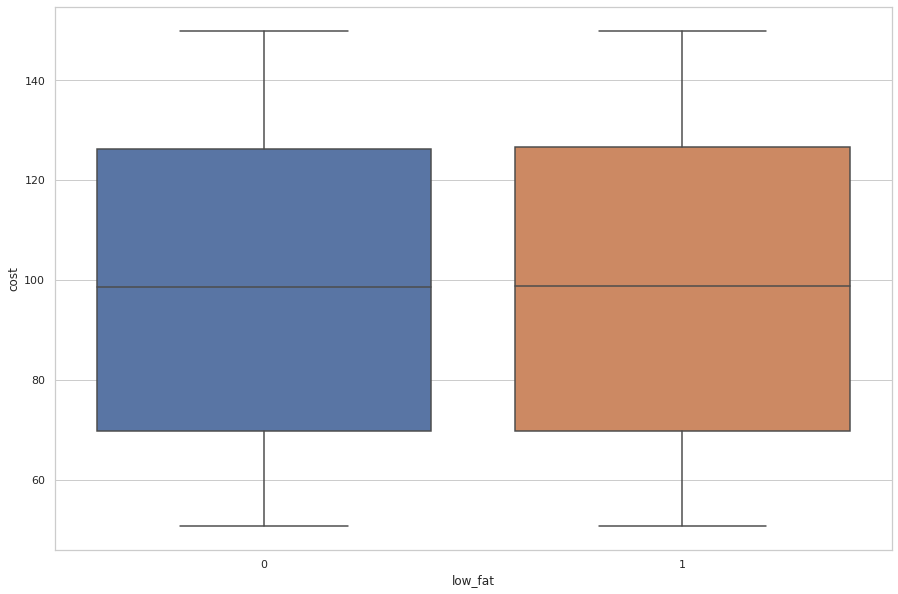

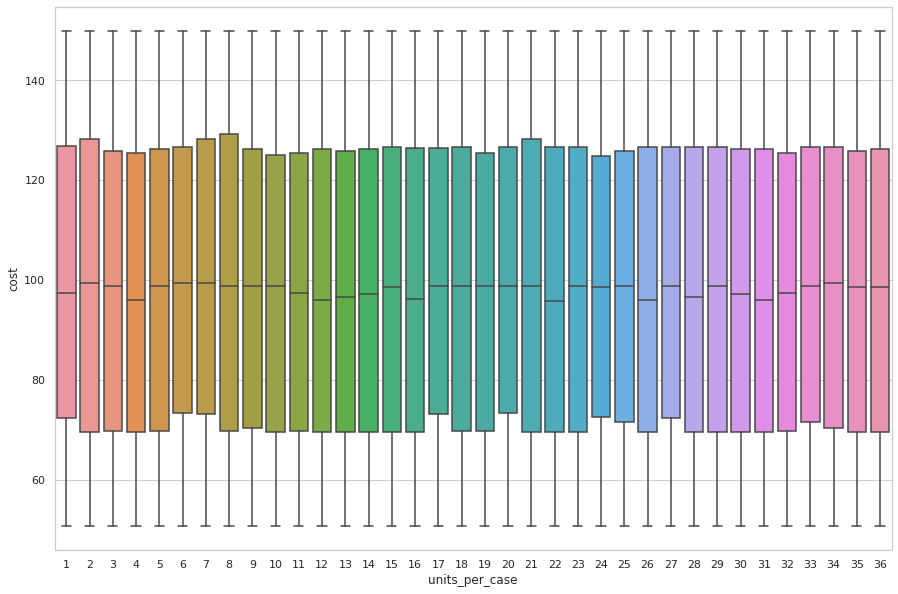

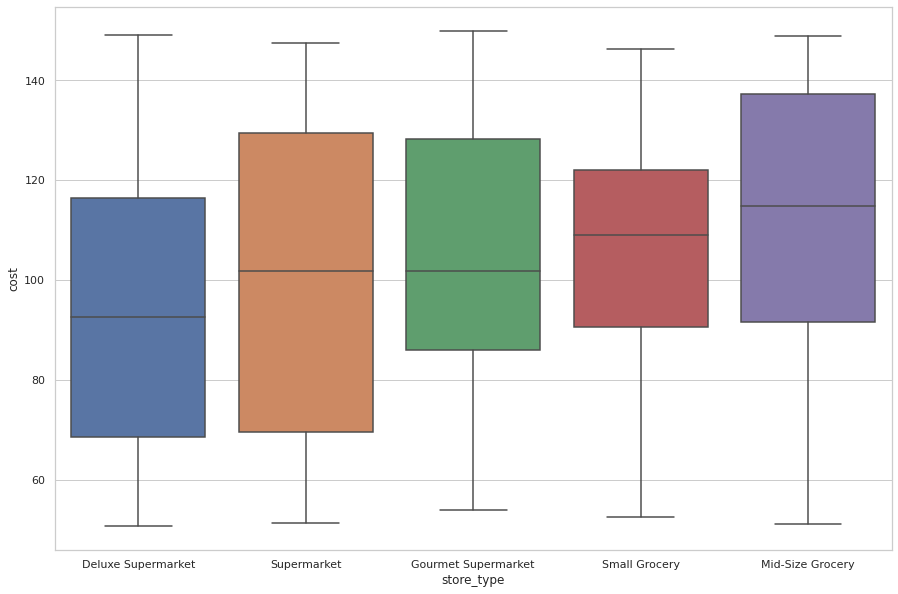

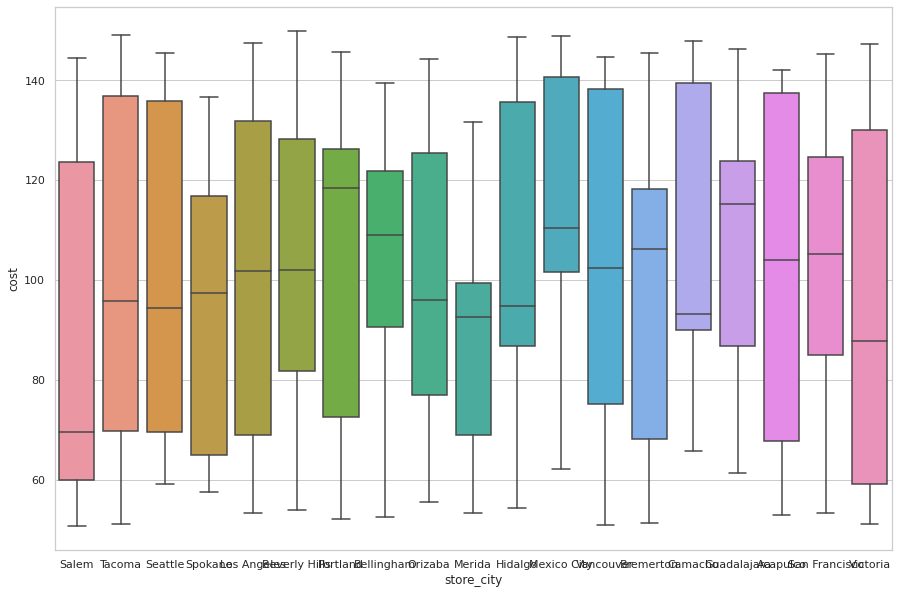

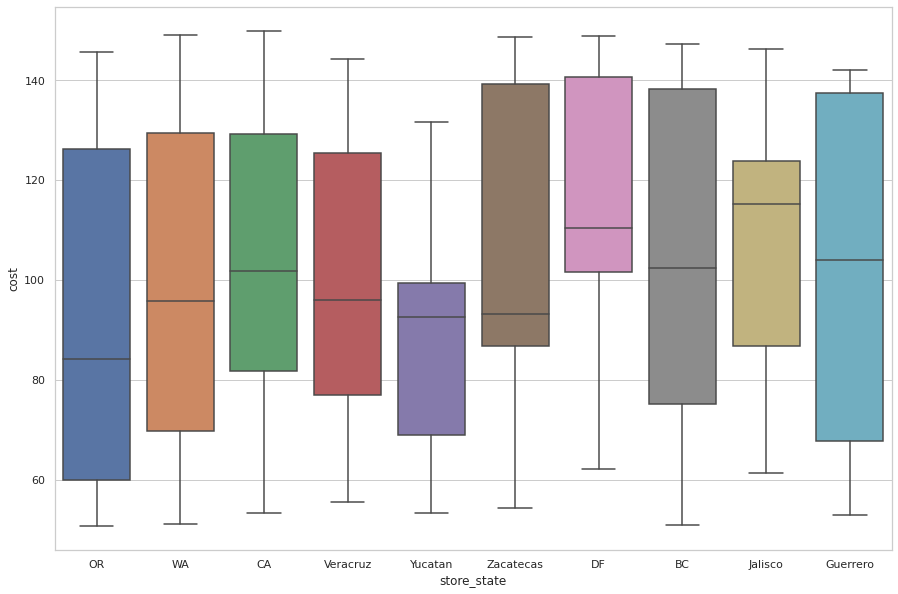

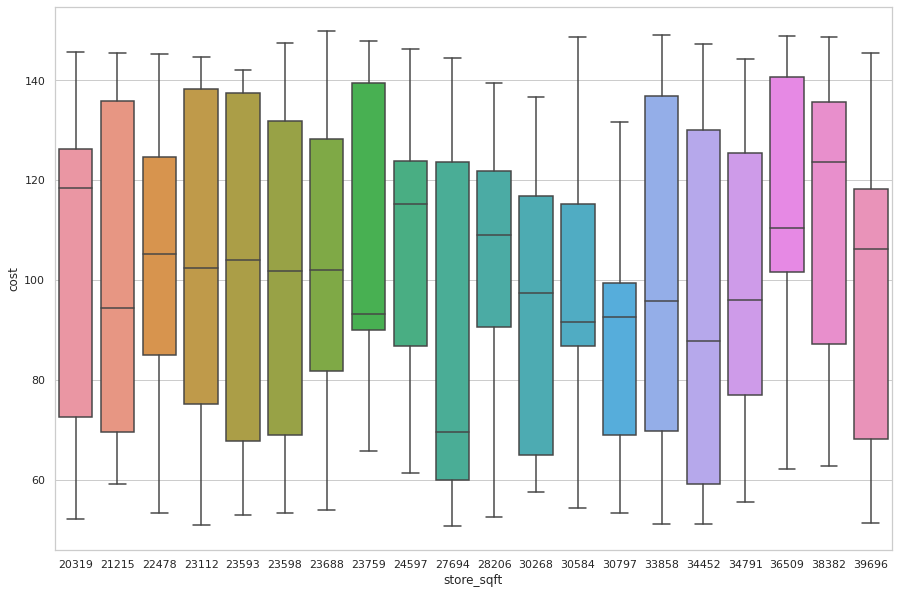

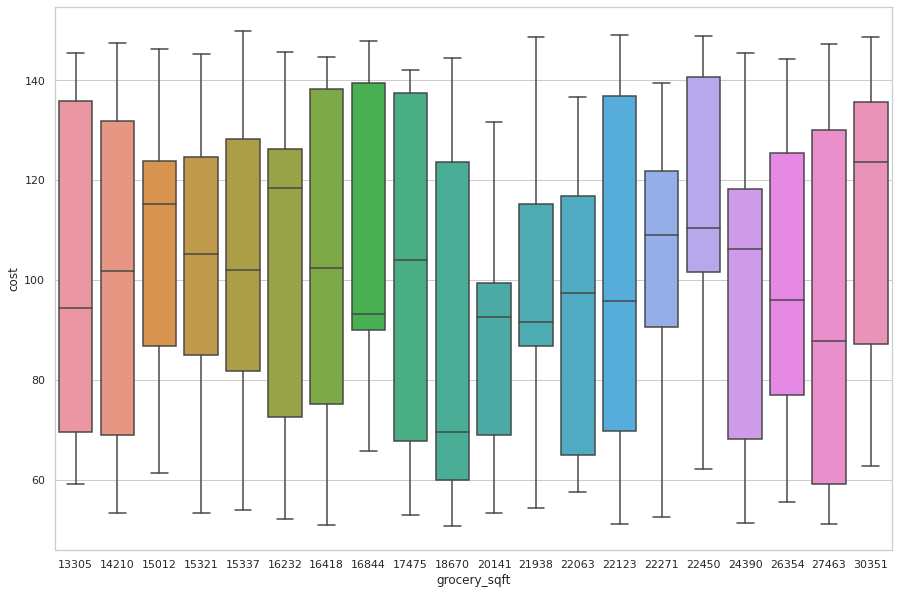

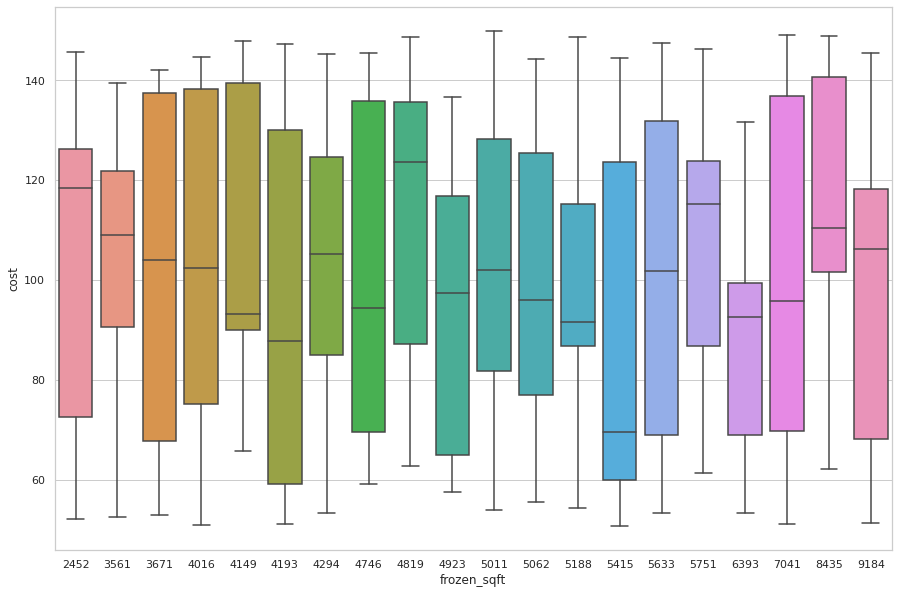

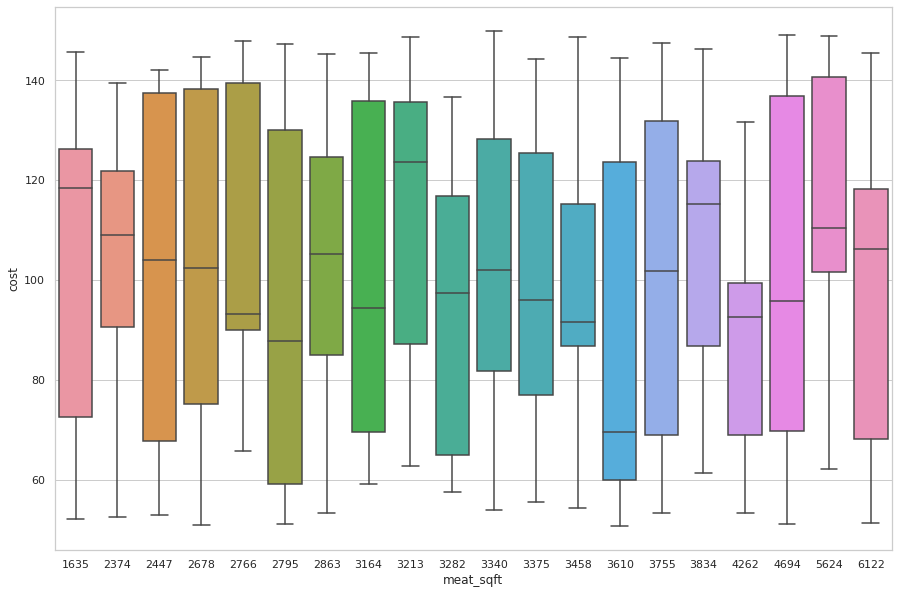

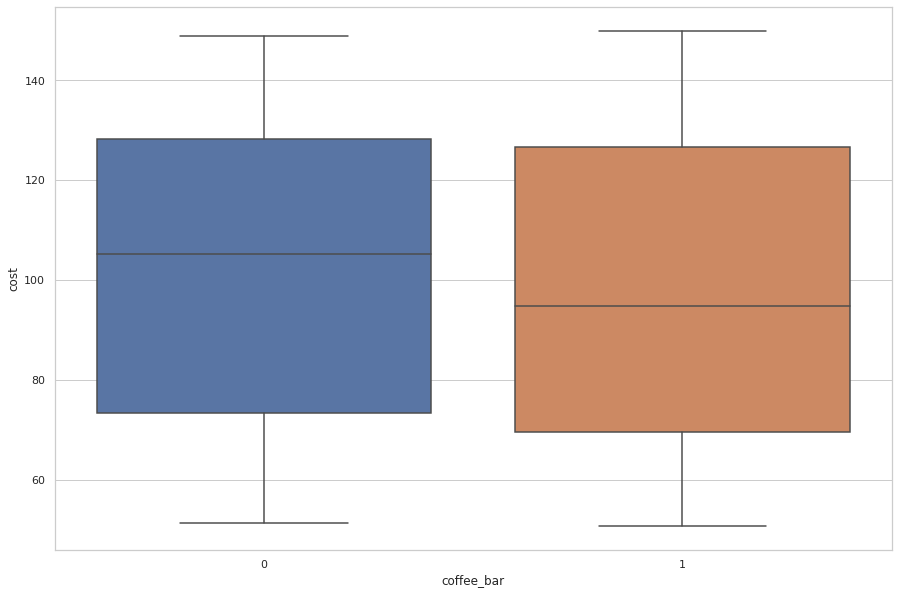

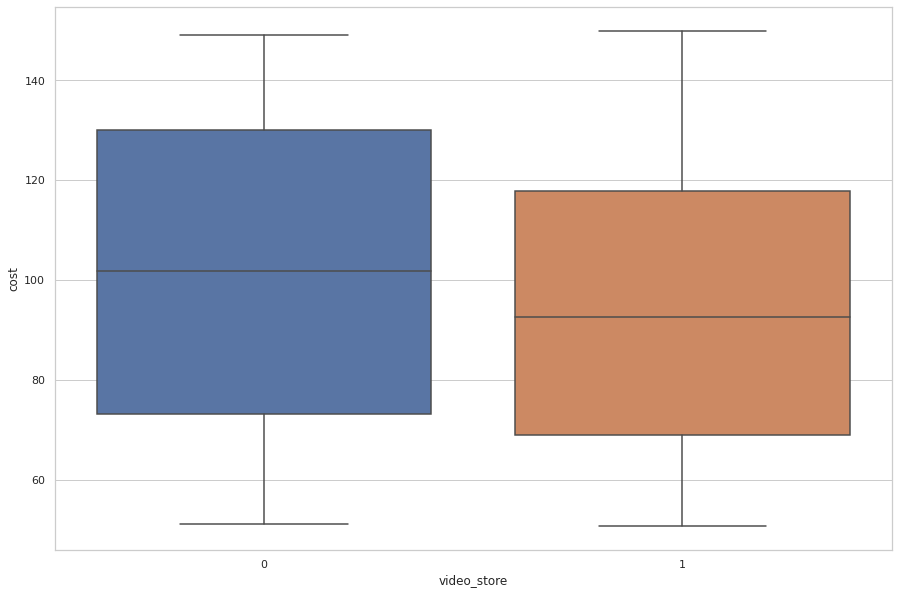

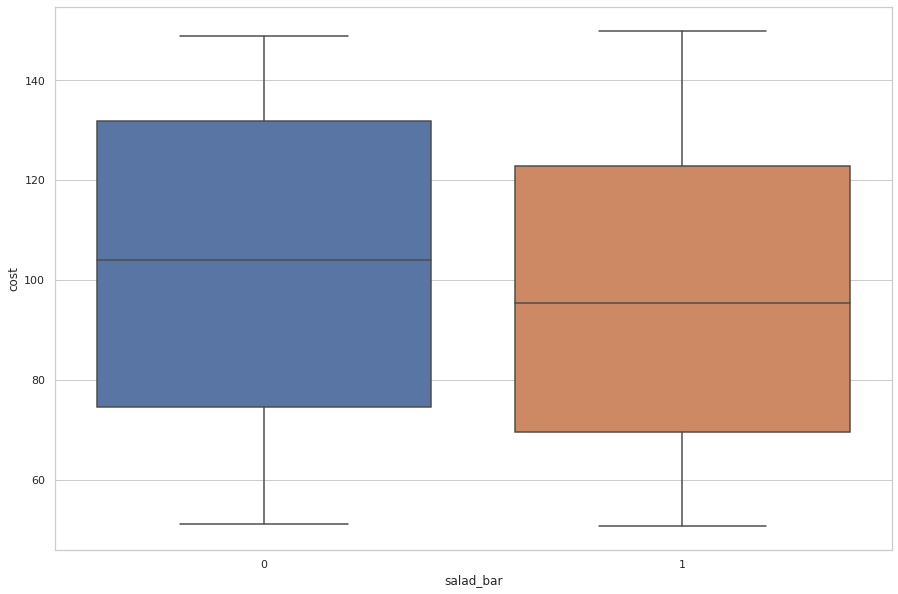

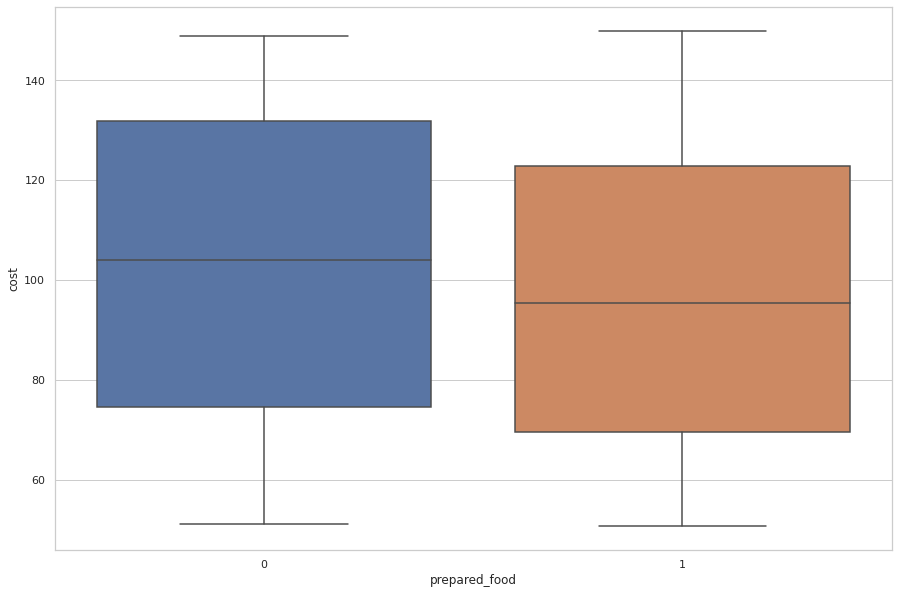

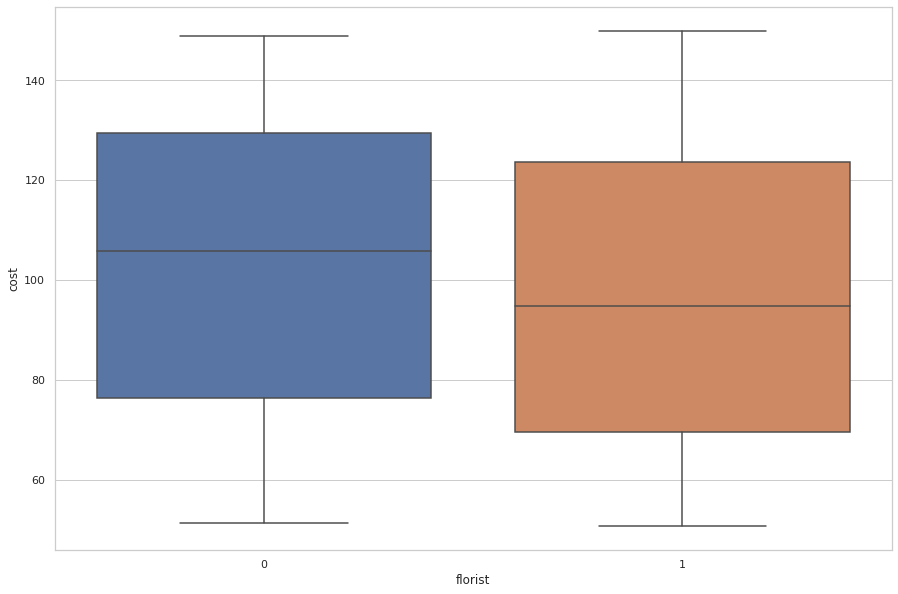

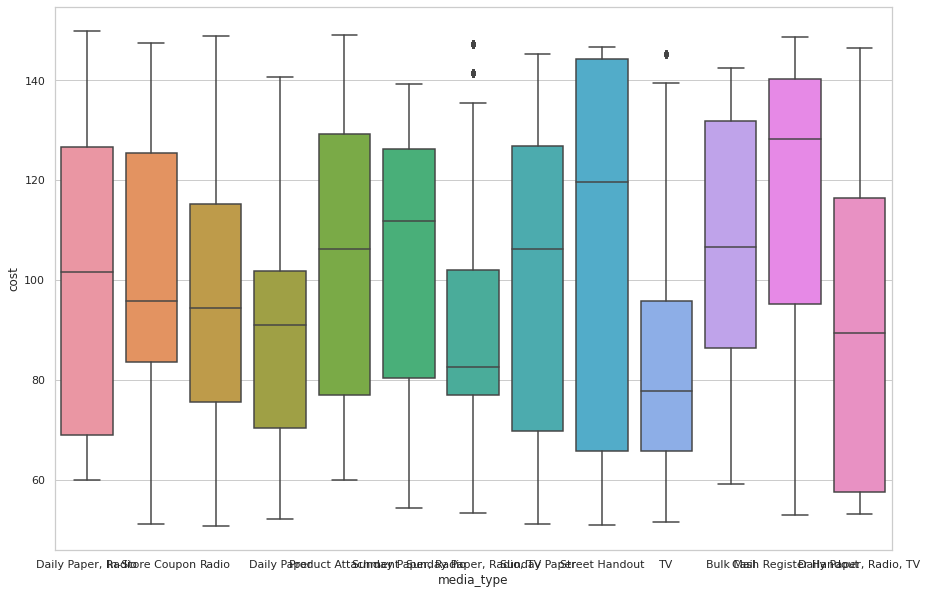

In [114]:
for feature in categorical_features:
  plt.figure(figsize=(15,10))
  sns.boxplot(x=df[feature],y="cost",data=df)

#**Encoding categorical feature**

In [117]:
encoding_feature=["food_category","food_department","food_family","promotion_name","sales_country","marital_status","gender","education","member_card","occupation","houseowner","avg. yearly_income","brand_name","units_per_case","store_type","store_city","store_state","store_sqft","grocery_sqft","frozen_sqft","meat_sqft","media_type"]

In [121]:
for feature in encoding_feature:
  labels_ordered=df.groupby([feature]).mean().index
  labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
  df[feature]=df[feature].map(labels_ordered)

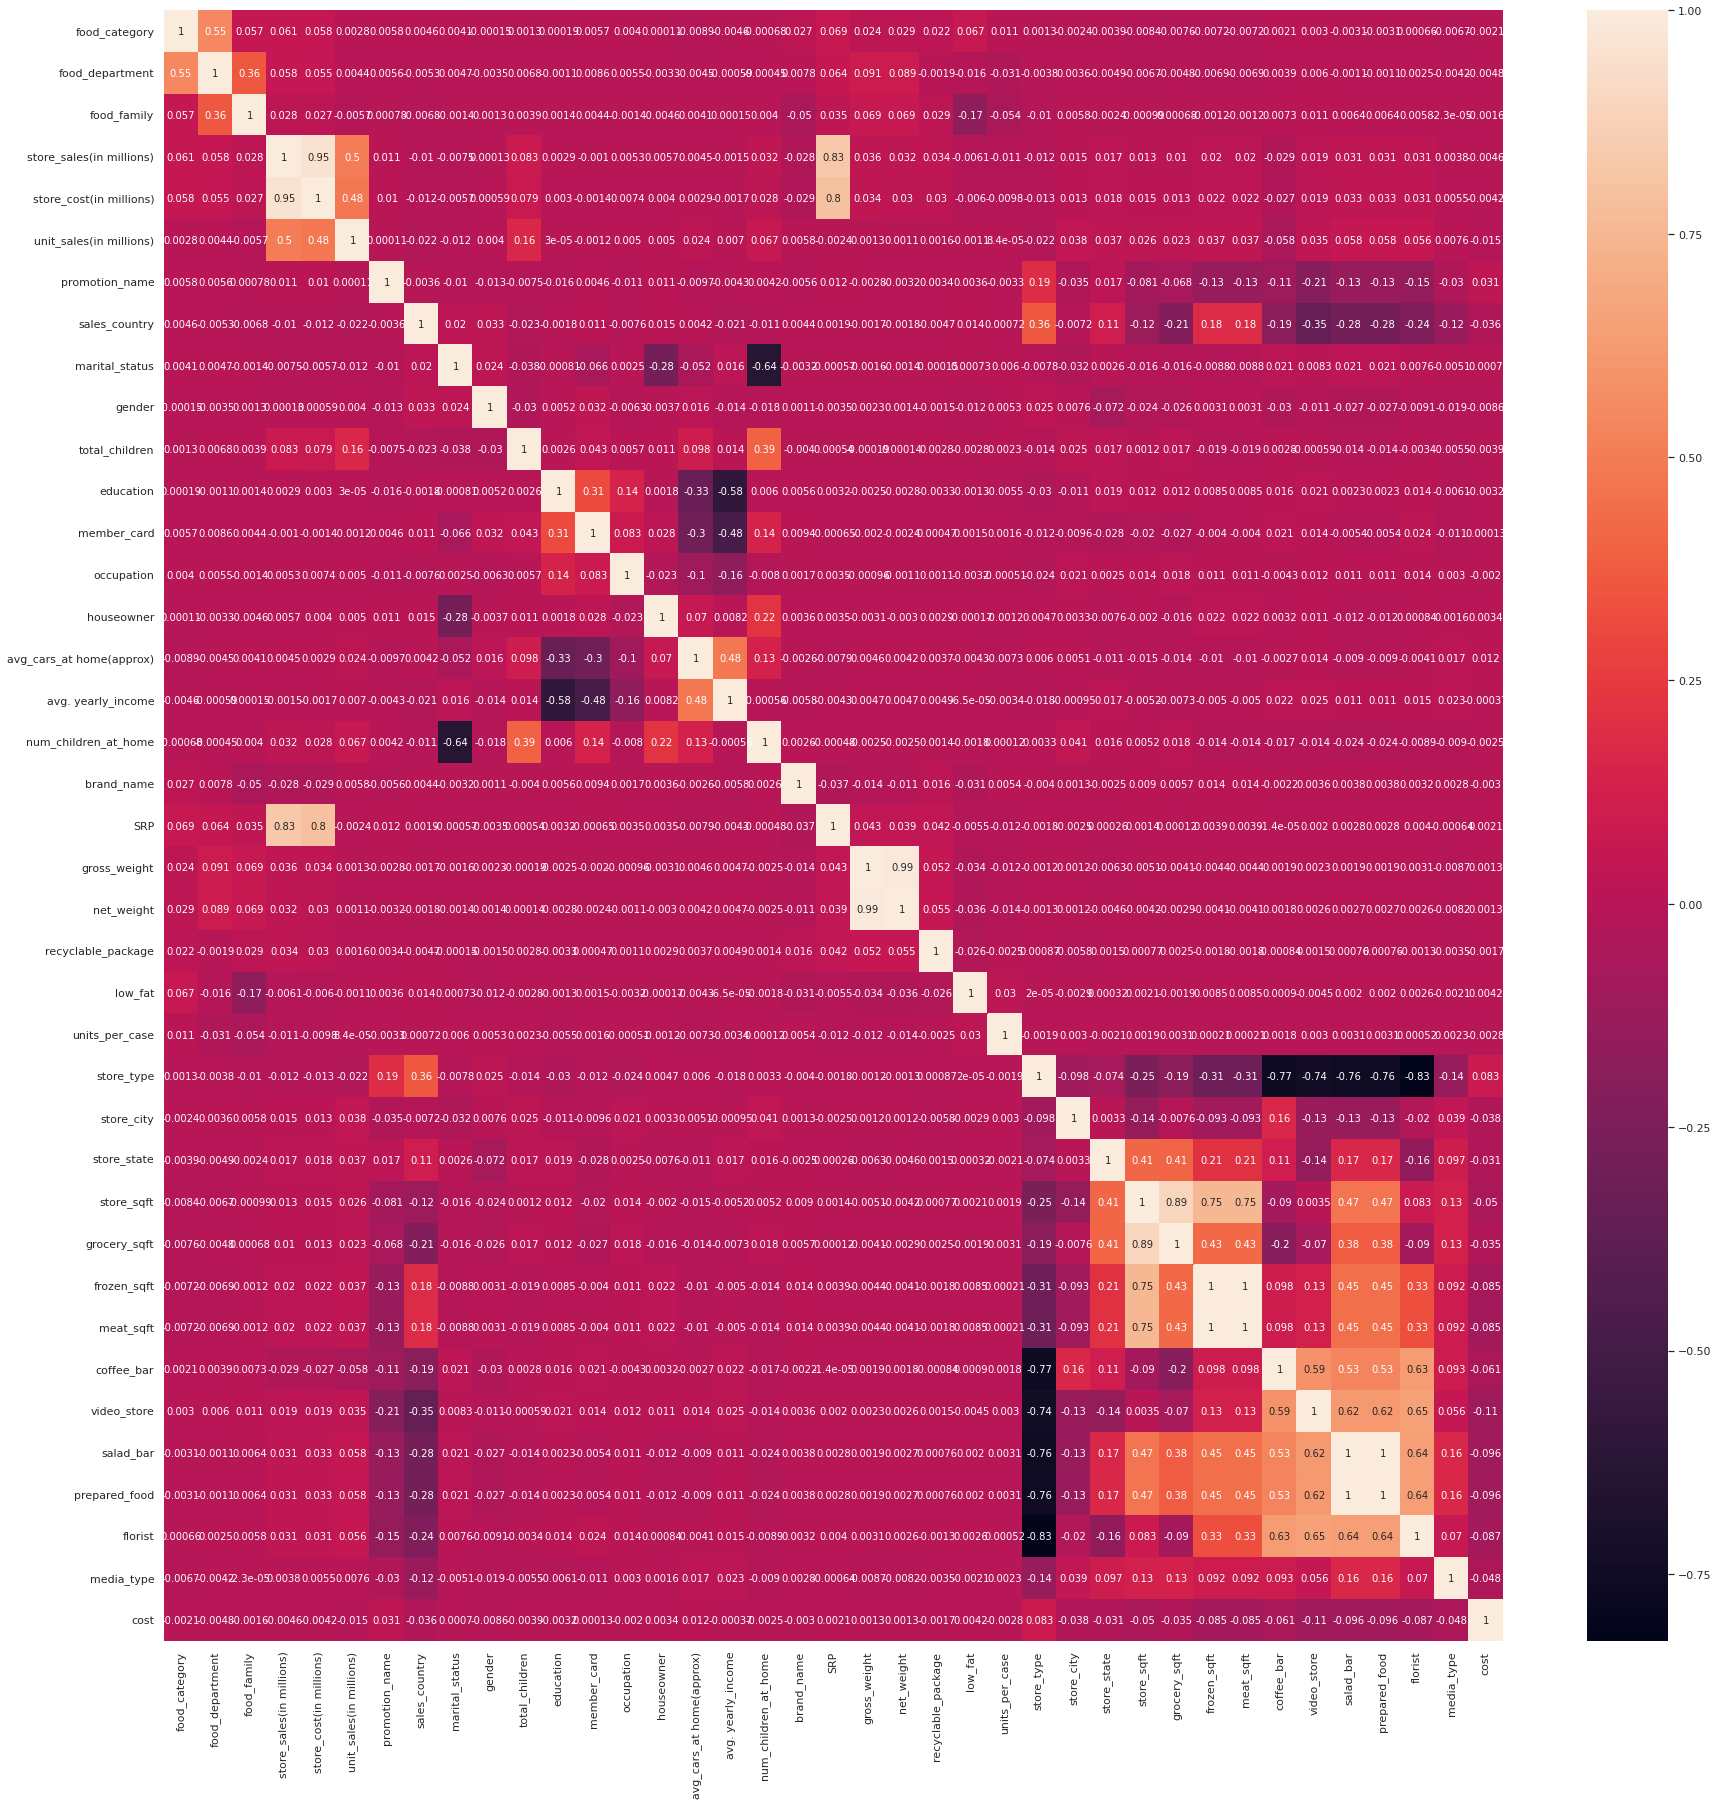

In [126]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

#**Independent and dependent feature**

In [127]:
X=df.drop('cost',axis=1)
y=df['cost']

In [128]:
print(X.shape)

(60428, 38)


In [132]:
from sklearn.feature_selection import mutual_info_regression
#determine the mutual information
mutual_info=mutual_info_regression(X,y)
mutual_info


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.11644707e-04,
       2.44839723e-03, 7.48047888e-02, 3.77882186e+00, 8.18030130e-01,
       1.58656326e-02, 1.55379013e-02, 7.66870868e-02, 5.47275539e-02,
       4.50669945e-02, 5.64130890e-02, 1.72006130e-02, 7.14574278e-02,
       1.01221540e-01, 7.68866416e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.52841973e-03,
       0.00000000e+00, 1.15805309e+00, 2.71806534e+00, 1.92926258e+00,
       2.73150082e+00, 2.72910557e+00, 2.72909450e+00, 2.73486162e+00,
       6.07307012e-01, 5.91340418e-01, 6.14085384e-01, 6.17557546e-01,
       6.63267438e-01, 2.54307651e+00])

In [133]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X.columns
mutual_info.sort_values(ascending=False)

promotion_name              3.778822
meat_sqft                   2.734862
store_sqft                  2.731501
grocery_sqft                2.729106
frozen_sqft                 2.729094
store_city                  2.718065
media_type                  2.543077
store_state                 1.929263
store_type                  1.158053
sales_country               0.818030
florist                     0.663267
prepared_food               0.617558
salad_bar                   0.614085
coffee_bar                  0.607307
video_store                 0.591340
avg. yearly_income          0.101222
num_children_at_home        0.076887
total_children              0.076687
unit_sales(in millions)     0.074805
avg_cars_at home(approx)    0.071457
occupation                  0.056413
education                   0.054728
member_card                 0.045067
houseowner                  0.017201
marital_status              0.015866
gender                      0.015538
low_fat                     0.002528
s

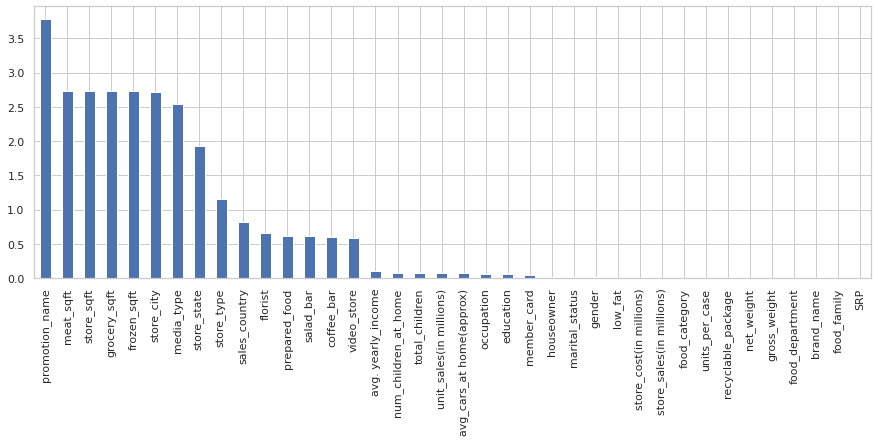

In [134]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [147]:
from sklearn.feature_selection import SelectPercentile

In [148]:
## Selecting the top 20 percentile
sel_top_cols=SelectPercentile(mutual_info_regression,percentile=50) ##selecting top 20% of feature
sel_top_cols.fit(X,y)

SelectPercentile(percentile=50,
                 score_func=<function mutual_info_regression at 0x7f0b83e6cc10>)

In [149]:
  sel_top_cols.get_support()

array([False, False, False, False, False,  True,  True,  True, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [150]:
X.columns[sel_top_cols.get_support()]

Index(['unit_sales(in millions)', 'promotion_name', 'sales_country',
       'total_children', 'avg. yearly_income', 'num_children_at_home',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type'],
      dtype='object')

In [158]:
X=X[X.columns[sel_top_cols.get_support()]]

#**Train test split**

In [160]:
from sklearn.model_selection import train_test_split

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

#**Scale the data**

In [165]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [166]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#**Regression Algorithm**




###**Linear Regression**

In [167]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [168]:
LR.fit(X_train_scaled,y_train)

LinearRegression()

In [170]:
pred_lr=LR.predict(X_test_scaled)

In [171]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred_lr)
print("R squared {}".format(r2))

R squared 0.03934199224284607


In [173]:
n=42299 #no of sample observations
k=19 #no. of independent features
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R squared {}".format(adj_r2_score))

Adjusted R squared 0.038910276683173706


###**Gradient boosting**

In [174]:
from sklearn.ensemble import GradientBoostingRegressor
XG=GradientBoostingRegressor()

In [175]:
XG.fit(X_train_scaled,y_train)

GradientBoostingRegressor()

In [176]:
XG_pred=XG.predict(X_test_scaled)

In [181]:
r2 = r2_score(y_test,XG_pred)
print("R squared {}".format(r2))

R squared 0.5538264638619856


###Improvement steps

###1) Our model is overfitting , try reducing this
###2) do another method of feature selection and see the difference
###3) Try other Regression based Algorithm or a ensemble technique

